# Projet 4 : Anticipez les besoins en consommation de bâtiments

## Introduction

La ville de Seattle s'est fixée pour objectif d'atteindre la neutralité carbone d'ici 2050. C'est donc dans cette perspective que notre équipe décide de se concentrer sur la consommation et les émissions des bâtiments non résidentiels. En effet, des données détaillées ont été collectées en 2016, mais leur obtention est très coûteuse.

Notre mission consiste donc à utiliser ces données existantes pour prédire les émissions de CO2 et la consommation totale d'énergie des bâtiments non encore mesurés.

On commencera par sélectionner, transformer et créer des variables pertinentes puis nous réaliserons une courte analyse exploratoire. L'objectif étant par la suite de tester différents algorithmes de sorte à prédire ses fameuse données d'émission et de consommation en évaluant et en optimisant rigoureusement leurs performances. On retrouvera cette partie dans les notebooks "Projet 4 Energy" et "Projet 4 CO2".

#### Importation des librairies nécessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importation du fichier à étudier

In [2]:
data = pd.read_csv("2016_Building_Energy_Benchmarking.csv")

In [3]:
# Cela me permet de voir si mon fichier c'est bien téléchargé et d'avoir une première impression de mes données 
data.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
0                    0659000030  ...      1.156514e+06         3946027.0   
1                    0659000220  ...      9.504252e+05         3242851.0   
2                    0659000475  ...      1.451544e+07        49526664.0   
3                    0659000640  ...      8.115253e+05         2768924.0   
4                    0659000970  ...      1.573449e+06         5368607.0   

   NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
0         12764.52930         1276453.0        False       NaN   
1         51450.81641         5145082.0        False       NaN   
2         14938.00000         1493800.0        False       NaN   
3         18112.13086         1811213.0        False       NaN   
4         88039.98438         8803998.0        False       NaN   

   ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0         Compliant      NaN             249.98                   2.83  
1         Compliant      NaN             295.86                   2.86  
2         Compliant      NaN            2089.28                   2.19  
3         Compliant      NaN             286.43                   4.67  
4         Compliant      NaN             505.01                   2.88  

[5 rows x 46 columns]

# I) Traitement du jeu de données : 

### Structure

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [5]:
# Je fait ici mon premier describe pour avoir un aperçu plus précis des données des éventuels outliers etc... 
data.describe()

OSEBuildingID  DataYear       ZipCode  CouncilDistrictCode  \
count    3376.000000    3376.0   3360.000000          3376.000000   
mean    21208.991114    2016.0  98116.949107             4.439277   
std     12223.757015       0.0     18.615205             2.120625   
min         1.000000    2016.0  98006.000000             1.000000   
25%     19990.750000    2016.0  98105.000000             3.000000   
50%     23112.000000    2016.0  98115.000000             4.000000   
75%     25994.250000    2016.0  98122.000000             7.000000   
max     50226.000000    2016.0  98272.000000             7.000000   

          Latitude    Longitude    YearBuilt  NumberofBuildings  \
count  3376.000000  3376.000000  3376.000000        3368.000000   
mean     47.624033  -122.334795  1968.573164           1.106888   
std       0.047758     0.027203    33.088156           2.108402   
min      47.499170  -122.414250  1900.000000           0.000000   
25%      47.599860  -122.350662  1948.000000           1.000000   
50%      47.618675  -122.332495  1975.000000           1.000000   
75%      47.657115  -122.319407  1997.000000           1.000000   
max      47.733870  -122.220966  2015.000000         111.000000   

       NumberofFloors  PropertyGFATotal  ...  SiteEnergyUse(kBtu)  \
count     3376.000000      3.376000e+03  ...         3.371000e+03   
mean         4.709123      9.483354e+04  ...         5.403667e+06   
std          5.494465      2.188376e+05  ...         2.161063e+07   
min          0.000000      1.128500e+04  ...         0.000000e+00   
25%          2.000000      2.848700e+04  ...         9.251286e+05   
50%          4.000000      4.417500e+04  ...         1.803753e+06   
75%          5.000000      9.099200e+04  ...         4.222455e+06   
max         99.000000      9.320156e+06  ...         8.739237e+08   

       SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
count           3.370000e+03    3.367000e+03      3.367000e+03   
mean            5.276726e+06    2.745959e+05      1.086639e+06   
std             1.593879e+07    3.912173e+06      4.352478e+06   
min             0.000000e+00    0.000000e+00     -3.382680e+04   
25%             9.701822e+05    0.000000e+00      1.874229e+05   
50%             1.904452e+06    0.000000e+00      3.451299e+05   
75%             4.381429e+06    0.000000e+00      8.293178e+05   
max             4.716139e+08    1.349435e+08      1.925775e+08   

       Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  Comments  \
count       3.367000e+03        3.367000e+03      3.367000e+03       0.0   
mean        3.707612e+06        1.368505e+04      1.368505e+06       NaN   
std         1.485066e+07        6.709781e+04      6.709781e+06       NaN   
min        -1.154170e+05        0.000000e+00      0.000000e+00       NaN   
25%         6.394870e+05        0.000000e+00      0.000000e+00       NaN   
50%         1.177583e+06        3.237538e+03      3.237540e+05       NaN   
75%         2.829632e+06        1.189033e+04      1.189034e+06       NaN   
max         6.570744e+08        2.979090e+06      2.979090e+08       NaN   

       TotalGHGEmissions  GHGEmissionsIntensity  
count        3367.000000            3367.000000  
mean          119.723971               1.175916  
std           538.832227               1.821452  
min            -0.800000              -0.020000  
25%             9.495000               0.210000  
50%            33.920000               0.610000  
75%            93.940000               1.370000  
max         16870.980000              34.090000  

[8 rows x 30 columns]

In [6]:
data.duplicated().sum()

0

In [7]:
data.nunique()

OSEBuildingID                      3376
DataYear                              1
BuildingType                          8
PrimaryPropertyType                  24
PropertyName                       3362
Address                            3354
City                                  1
State                                 1
ZipCode                              55
TaxParcelIdentificationNumber      3268
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
YearBuilt                           113
NumberofBuildings                    17
NumberofFloors                       50
PropertyGFATotal                   3195
PropertyGFAParking                  496
PropertyGFABuilding(s)             3193
ListOfAllPropertyUseTypes           466
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType         50
SecondLargestPropertyUseTypeGFA    1352


In [8]:
nbr_valeurs_manquantes = data.isna().sum().sum()
nbr_valeurs = data.size
pourcentage_valeurs_manquantes = (nbr_valeurs_manquantes / nbr_valeurs ) * 100
pourcentage_valeurs_manquantes

12.847723057902327

Tout d'abord nous savons que pour notre étude nous allons nous intéresser seulement aux bâtiment non résidentiel nous pouvons donc supprimer tous les bâtiments résidentiels.

In [9]:
# Affichage de la répartition des valeurs dans la colonne "BuildingType"
building_type = data['BuildingType'].value_counts()

print(building_type)

NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64


In [10]:
# Liste des types de bâtiments résidentiels à exclure
residential_types = ['Multifamily LR (1-4)', 'Multifamily MR (5-9)', 'Multifamily HR (10+)']

# Je filtre les lignes où la colonne "BuildingType" n'est pas résidentielle
non_residential_df = data[~data['BuildingType'].isin(residential_types)]

# Affichage du nouveau DataFrame
non_residential_df.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
0                    0659000030  ...      1.156514e+06         3946027.0   
1                    0659000220  ...      9.504252e+05         3242851.0   
2                    0659000475  ...      1.451544e+07        49526664.0   
3                    0659000640  ...      8.115253e+05         2768924.0   
4                    0659000970  ...      1.573449e+06         5368607.0   

   NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
0         12764.52930         1276453.0        False       NaN   
1         51450.81641         5145082.0        False       NaN   
2         14938.00000         1493800.0        False       NaN   
3         18112.13086         1811213.0        False       NaN   
4         88039.98438         8803998.0        False       NaN   

   ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0         Compliant      NaN             249.98                   2.83  
1         Compliant      NaN             295.86                   2.86  
2         Compliant      NaN            2089.28                   2.19  
3         Compliant      NaN             286.43                   4.67  
4         Compliant      NaN             505.01                   2.88  

[5 rows x 46 columns]

Je veux maintenant supprimer les colonnes que ne seront absolument pas intéressante pour notre projet comme tous ce qui est identifiant unique etc : 

In [11]:
# Liste des noms de colonnes à supprimer
columns_drop = ['OSEBuildingID', 'DataYear', 'PropertyName', 'City', 'State', 'TaxParcelIdentificationNumber', 'Address']

# Suppression des colonnes 
non_residential_df = non_residential_df.drop(columns=columns_drop)

# Vérification
non_residential_df

BuildingType PrimaryPropertyType  ZipCode  CouncilDistrictCode  \
0         NonResidential               Hotel  98101.0                    7   
1         NonResidential               Hotel  98101.0                    7   
2         NonResidential               Hotel  98101.0                    7   
3         NonResidential               Hotel  98101.0                    7   
4         NonResidential               Hotel  98121.0                    7   
...                  ...                 ...      ...                  ...   
3371  Nonresidential COS              Office      NaN                    2   
3372  Nonresidential COS               Other      NaN                    2   
3373  Nonresidential COS               Other      NaN                    7   
3374  Nonresidential COS  Mixed Use Property      NaN                    1   
3375  Nonresidential COS  Mixed Use Property      NaN                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
0                  DOWNTOWN  47.61220 -122.33799       1927   
1                  DOWNTOWN  47.61317 -122.33393       1996   
2                  DOWNTOWN  47.61393 -122.33810       1969   
3                  DOWNTOWN  47.61412 -122.33664       1926   
4                  DOWNTOWN  47.61375 -122.34047       1980   
...                     ...       ...        ...        ...   
3371       GREATER DUWAMISH  47.56722 -122.31154       1990   
3372               DOWNTOWN  47.59625 -122.32283       2004   
3373  MAGNOLIA / QUEEN ANNE  47.63644 -122.35784       1974   
3374       GREATER DUWAMISH  47.52832 -122.32431       1989   
3375       GREATER DUWAMISH  47.53939 -122.29536       1938   

      NumberofBuildings  NumberofFloors  ...  Electricity(kWh)  \
0                   1.0              12  ...      1.156514e+06   
1                   1.0              11  ...      9.504252e+05   
2                   1.0              41  ...      1.451544e+07   
3                   1.0              10  ...      8.115253e+05   
4                   1.0              18  ...      1.573449e+06   
...                 ...             ...  ...               ...   
3371                1.0               1  ...      1.536550e+05   
3372                1.0               1  ...      1.162210e+05   
3373                1.0               1  ...      5.252517e+05   
3374                1.0               1  ...      1.022480e+05   
3375                1.0               1  ...      1.267744e+05   

      Electricity(kBtu)  NaturalGas(therms) NaturalGas(kBtu) DefaultData  \
0          3.946027e+06        12764.529300     1.276453e+06       False   
1          3.242851e+06        51450.816410     5.145082e+06       False   
2          4.952666e+07        14938.000000     1.493800e+06       False   
3          2.768924e+06        18112.130860     1.811213e+06       False   
4          5.368607e+06        88039.984380     8.803998e+06       False   
...                 ...                 ...              ...         ...   
3371       5.242709e+05         3254.750244     3.254750e+05        True   
3372       3.965461e+05         5537.299805     5.537300e+05       False   
3373       1.792159e+06        39737.390630     3.973739e+06       False   
3374       3.488702e+05         3706.010010     3.706010e+05       False   
3375       4.325542e+05         7203.419922     7.203420e+05       False   

      Comments              ComplianceStatus  Outlier TotalGHGEmissions  \
0          NaN                     Compliant      NaN            249.98   
1          NaN                     Compliant      NaN            295.86   
2          NaN                     Compliant      NaN           2089.28   
3          NaN                     Compliant      NaN            286.43   
4          NaN                     Compliant      NaN            505.01   
...        ...                           ...      ...               ...   
3371       NaN  Error - Correct Default Data      NaN             20.94   
3372       N

In [12]:
#Remplacement des valeurs manquantes dans la colonnes ZipCode
non_residential_df['ZipCode'].fillna(0, inplace=True)

In [13]:
# Affichage de la répartition des valeurs dans la colonne "BuildingType"
LargestPropertyUseType = data['LargestPropertyUseType'].value_counts()

print(LargestPropertyUseType)

Multifamily Housing                                     1667
Office                                                   498
Non-Refrigerated Warehouse                               199
K-12 School                                              139
Other                                                    102
Retail Store                                              99
Hotel                                                     77
Worship Facility                                          71
Distribution Center                                       54
Senior Care Community                                     46
Supermarket/Grocery Store                                 41
Medical Office                                            41
Parking                                                   32
Other - Recreation                                        31
Self-Storage Facility                                     28
College/University                                        25
Residence Hall/Dormitory

In [14]:
# Mon objectif est ici de pouvoir observer les valeurs manquantes par variable
non_residential_df.isna().sum()

BuildingType                          0
PrimaryPropertyType                   0
ZipCode                               0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     2
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             2
LargestPropertyUseType                6
LargestPropertyUseTypeGFA             6
SecondLargestPropertyUseType        813
SecondLargestPropertyUseTypeGFA     813
ThirdLargestPropertyUseType        1315
ThirdLargestPropertyUseTypeGFA     1315
YearsENERGYSTARCertified           1570
ENERGYSTARScore                     574
SiteEUI(kBtu/sf)                      3
SiteEUIWN(kBtu/sf)                    3
SourceEUI(kBtu/sf)                    2


Comme nous pouvons le voir nous avons énormément de données manquantes pour quelques colonnes notamment "Outlier" , "Comments", "ThirdLargestPropertyUseType", "ThirdLargestPropertyUseTypeGFA", "YearsENERGYSTARCertified". C'est pour cela que je décide de les supprimer car elle n'apporterons rien pour notre étude.

In [15]:
# Liste des noms de colonnes à supprimer
columns_drop = ['Outlier', 'Comments', 'ThirdLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'YearsENERGYSTARCertified','SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA']

# Suppression des colonnes
non_residential_df = non_residential_df.drop(columns=columns_drop)

In [16]:
non_residential_df.nunique()

BuildingType                    5
PrimaryPropertyType            22
ZipCode                        49
CouncilDistrictCode             7
Neighborhood                   19
Latitude                     1497
Longitude                    1408
YearBuilt                     113
NumberofBuildings              16
NumberofFloors                 45
PropertyGFATotal             1590
PropertyGFAParking            327
PropertyGFABuilding(s)       1585
ListOfAllPropertyUseTypes     373
LargestPropertyUseType         56
LargestPropertyUseTypeGFA    1561
ENERGYSTARScore               100
SiteEUI(kBtu/sf)              961
SiteEUIWN(kBtu/sf)            974
SourceEUI(kBtu/sf)           1268
SourceEUIWN(kBtu/sf)         1308
SiteEnergyUse(kBtu)          1651
SiteEnergyUseWN(kBtu)        1640
SteamUse(kBtu)                115
Electricity(kWh)             1655
Electricity(kBtu)            1655
NaturalGas(therms)           1189
NaturalGas(kBtu)             1189
DefaultData                     2
ComplianceStat

In [17]:
#Vérification
non_residential_df.isna().sum()

BuildingType                   0
PrimaryPropertyType            0
ZipCode                        0
CouncilDistrictCode            0
Neighborhood                   0
Latitude                       0
Longitude                      0
YearBuilt                      0
NumberofBuildings              2
NumberofFloors                 0
PropertyGFATotal               0
PropertyGFAParking             0
PropertyGFABuilding(s)         0
ListOfAllPropertyUseTypes      2
LargestPropertyUseType         6
LargestPropertyUseTypeGFA      6
ENERGYSTARScore              574
SiteEUI(kBtu/sf)               3
SiteEUIWN(kBtu/sf)             3
SourceEUI(kBtu/sf)             2
SourceEUIWN(kBtu/sf)           2
SiteEnergyUse(kBtu)            2
SiteEnergyUseWN(kBtu)          3
SteamUse(kBtu)                 2
Electricity(kWh)               2
Electricity(kBtu)              2
NaturalGas(therms)             2
NaturalGas(kBtu)               2
DefaultData                    0
ComplianceStatus               0
TotalGHGEm

In [18]:
# NumberofBuildings => Nombre de bâtiments inclus dans le rapport du bien. 
# Dans les cas où une propriété est déclarée comme campus, plusieurs bâtiments peuvent être inclus dans un seul rapport.

non_residential_df['NumberofBuildings'].unique()

array([  1.,   3.,   0.,   2.,   4.,  27.,   6.,  11.,  14.,   9.,   5.,
        nan,   7.,   8.,  23.,  10., 111.])

In [19]:
# Remplacement des NaN par la moyenne des valeurs non NaN dans la colonne 'NumberofBuildings'
non_residential_df['NumberofBuildings'].fillna(non_residential_df['NumberofBuildings'].mean(), inplace=True)
non_residential_df['ENERGYSTARScore'].fillna(non_residential_df['ENERGYSTARScore'].mean(), inplace=True)
non_residential_df['TotalGHGEmissions'].fillna(non_residential_df['TotalGHGEmissions'].mean(), inplace=True)
non_residential_df['GHGEmissionsIntensity'].fillna(non_residential_df['GHGEmissionsIntensity'].mean(), inplace=True)

Je peux également remplacer les valeurs manquantes des colonnes qui représentes les différents paramètres énergétiques par leur moyennes pour ne plus avoir de valeurs manquantes même si elles restes rare.

In [20]:
# Liste des colonnes à traiter
colonnes_a_traiter = [
    'SiteEUI(kBtu/sf)',
    'SiteEUIWN(kBtu/sf)',
    'SourceEUI(kBtu/sf)',
    'SourceEUIWN(kBtu/sf)',
    'SiteEnergyUse(kBtu)',
    'SiteEnergyUseWN(kBtu)',
    'SteamUse(kBtu)',
    'Electricity(kWh)',
    'Electricity(kBtu)',
    'NaturalGas(therms)',
    'NaturalGas(kBtu)'
]

# Création d'une boucle for pour remplacer les NaN par la moyenne dans chaque colonne
for colonne in colonnes_a_traiter:
    non_residential_df[colonne].fillna(non_residential_df[colonne].mean(), inplace=True)

In [21]:
# Vérification
non_residential_df['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Library', 'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Courthouse', 'Other', 'K-12 School', 'College/University',
       'Automobile Dealership', 'Office', 'Self-Storage Facility',
       'Non-Refrigerated Warehouse', 'Other - Mall',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', 'Parking', 'Multifamily Housing',
       'Worship Facility', 'Restaurant', 'Data Center', 'Laboratory',
       'Supermarket/Grocery Store', 'Convention Center',
       'Urgent Care/Clinic/Other Outpatient', nan, 'Other - Services',
       'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing

In [22]:
# Vérification
non_residential_df.isna().sum()

BuildingType                 0
PrimaryPropertyType          0
ZipCode                      0
CouncilDistrictCode          0
Neighborhood                 0
Latitude                     0
Longitude                    0
YearBuilt                    0
NumberofBuildings            0
NumberofFloors               0
PropertyGFATotal             0
PropertyGFAParking           0
PropertyGFABuilding(s)       0
ListOfAllPropertyUseTypes    2
LargestPropertyUseType       6
LargestPropertyUseTypeGFA    6
ENERGYSTARScore              0
SiteEUI(kBtu/sf)             0
SiteEUIWN(kBtu/sf)           0
SourceEUI(kBtu/sf)           0
SourceEUIWN(kBtu/sf)         0
SiteEnergyUse(kBtu)          0
SiteEnergyUseWN(kBtu)        0
SteamUse(kBtu)               0
Electricity(kWh)             0
Electricity(kBtu)            0
NaturalGas(therms)           0
NaturalGas(kBtu)             0
DefaultData                  0
ComplianceStatus             0
TotalGHGEmissions            0
GHGEmissionsIntensity        0
dtype: i

In [23]:
variables_catégorielles = non_residential_df.select_dtypes(include=['object'])

# Permet d'afficher le nombre de valeurs uniques pour chaqu'une des variables catégorielles
for colonne in variables_catégorielles.columns:
    print(f"{colonne}: {variables_catégorielles[colonne].nunique()} valeurs uniques")


BuildingType: 5 valeurs uniques
PrimaryPropertyType: 22 valeurs uniques
Neighborhood: 19 valeurs uniques
ListOfAllPropertyUseTypes: 373 valeurs uniques
LargestPropertyUseType: 56 valeurs uniques
ComplianceStatus: 4 valeurs uniques


In [24]:
print(non_residential_df['PropertyGFAParking'])

0            0
1        15064
2       196718
3            0
4        62000
         ...  
3371         0
3372         0
3373         0
3374         0
3375         0
Name: PropertyGFAParking, Length: 1668, dtype: int64


Je décide donc de supprimer la variable ListOfAllPropertyUseTypes car elle contient trop de valeurs uniques. 

In [25]:
non_residential_df = non_residential_df.drop(columns=['ListOfAllPropertyUseTypes'])
non_residential_df

BuildingType PrimaryPropertyType  ZipCode  CouncilDistrictCode  \
0         NonResidential               Hotel  98101.0                    7   
1         NonResidential               Hotel  98101.0                    7   
2         NonResidential               Hotel  98101.0                    7   
3         NonResidential               Hotel  98101.0                    7   
4         NonResidential               Hotel  98121.0                    7   
...                  ...                 ...      ...                  ...   
3371  Nonresidential COS              Office      0.0                    2   
3372  Nonresidential COS               Other      0.0                    2   
3373  Nonresidential COS               Other      0.0                    7   
3374  Nonresidential COS  Mixed Use Property      0.0                    1   
3375  Nonresidential COS  Mixed Use Property      0.0                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
0                  DOWNTOWN  47.61220 -122.33799       1927   
1                  DOWNTOWN  47.61317 -122.33393       1996   
2                  DOWNTOWN  47.61393 -122.33810       1969   
3                  DOWNTOWN  47.61412 -122.33664       1926   
4                  DOWNTOWN  47.61375 -122.34047       1980   
...                     ...       ...        ...        ...   
3371       GREATER DUWAMISH  47.56722 -122.31154       1990   
3372               DOWNTOWN  47.59625 -122.32283       2004   
3373  MAGNOLIA / QUEEN ANNE  47.63644 -122.35784       1974   
3374       GREATER DUWAMISH  47.52832 -122.32431       1989   
3375       GREATER DUWAMISH  47.53939 -122.29536       1938   

      NumberofBuildings  NumberofFloors  ...  SiteEnergyUseWN(kBtu)  \
0                   1.0              12  ...           7.456910e+06   
1                   1.0              11  ...           8.664479e+06   
2                   1.0              41  ...           7.393711e+07   
3                   1.0              10  ...           6.946800e+06   
4                   1.0              18  ...           1.465650e+07   
...                 ...             ...  ...                    ...   
3371                1.0               1  ...           9.430032e+05   
3372                1.0               1  ...           1.053706e+06   
3373                1.0               1  ...           6.053764e+06   
3374                1.0               1  ...           7.828413e+05   
3375                1.0               1  ...           1.293722e+06   

      SteamUse(kBtu)  Electricity(kWh) Electricity(kBtu)  NaturalGas(therms)  \
0         2003882.00      1.156514e+06      3.946027e+06        12764.529300   
1               0.00      9.504252e+05      3.242851e+06        51450.816410   
2        21566554.00      1.451544e+07      4.952666e+07        14938.000000   
3         2214446.25      8.115253e+05      2.768924e+06        18112.130860   
4               0.00      1.573449e+06      5.368607e+06        88039.984380   
...              ...               ...               ...                 ...   
3371            0.00      1.536550e+05      5.242709e+05         3254.750244   
3372            0.00      1.162210e+05      3.965461e+05         5537.299805   
3373            0.00      5.252517e+05      1.792159e+06        39737.390630   
3374            0.00      1.022480e+05      3.488702e+05         3706.010010   
3375            0.00      1.267744e+05      4.325542e+05         7203.419922   

      NaturalGas(kBtu)  DefaultData              ComplianceStatus  \
0         1.276453e+06        False                     Compliant   
1         5.145082e+06        False                     Compliant   
2         1.493800e+06        False                     Compliant   
3         1.811213e+06        False                     Compliant   
4         8.803998e+06        False                     Compliant   
...                ...          ...                           ...   
3371      3.254750e+0

### Analyse exploratoire des données

Je décide maintenant de faire une matrice de corrélation pour justement pouvoir observer les potentielles corrélations entre nos différentes variables : 

C:\Users\paulm\AppData\Local\Temp\ipykernel_17260\451124236.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = non_residential_df.corr()


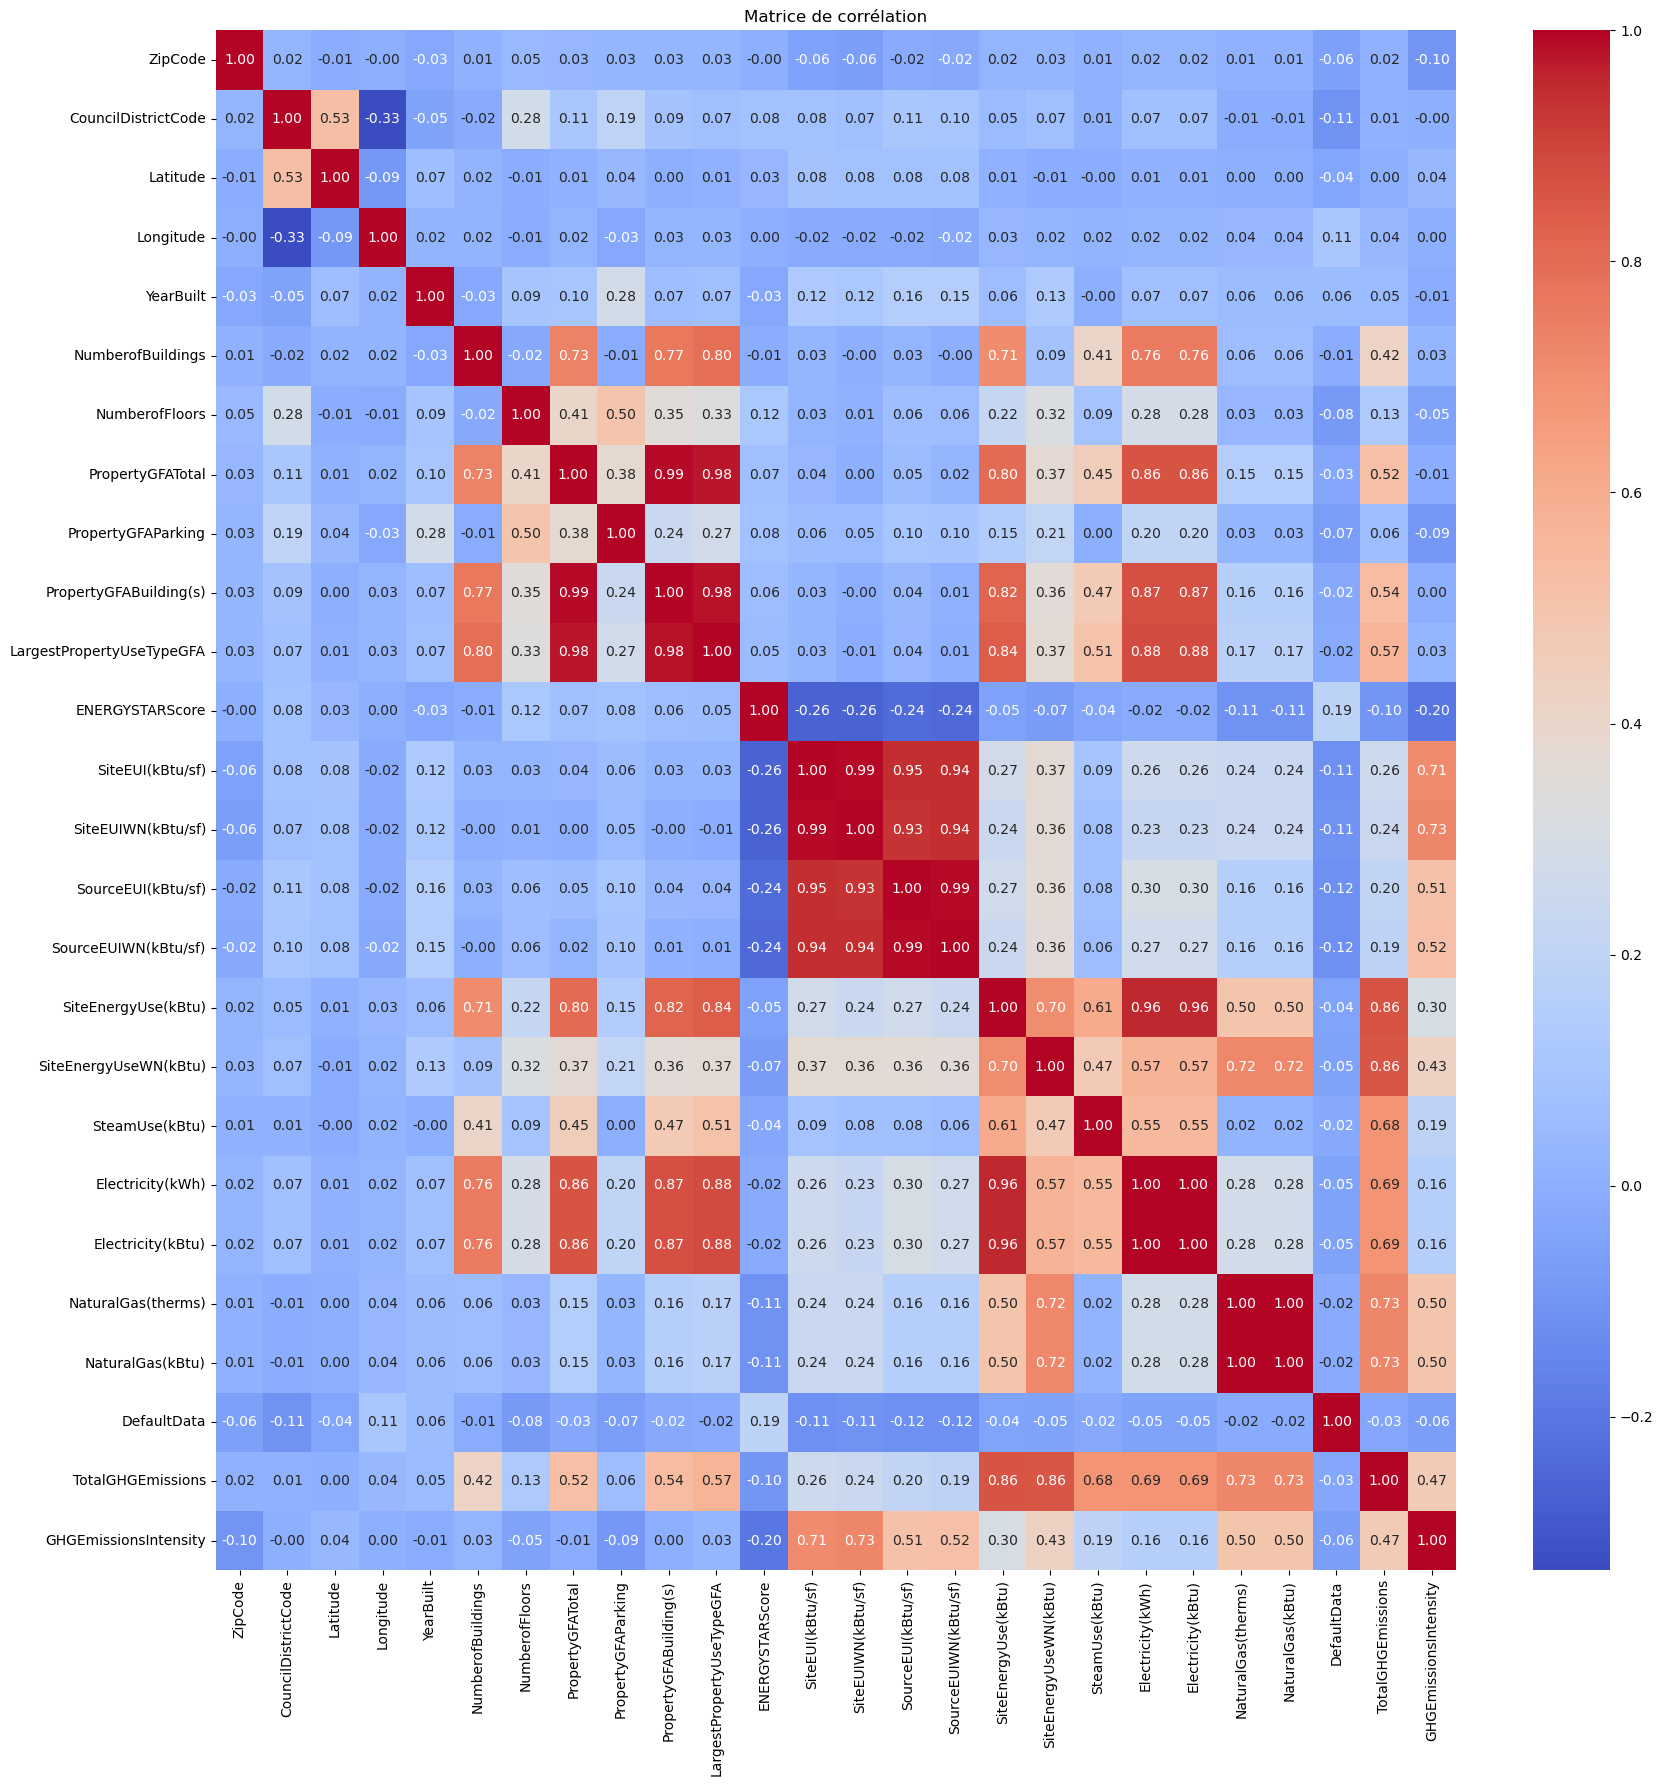

In [26]:
correlation_matrix = non_residential_df.corr()

# Affichage de la matrice de corrélation à l'aide d'un heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

In [27]:
# Pour être plus précis sur mes variables cibles:
correlation_matrix = non_residential_df[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']].corr()
correlation_matrix

SiteEnergyUse(kBtu)  TotalGHGEmissions
SiteEnergyUse(kBtu)              1.00000            0.85994
TotalGHGEmissions                0.85994            1.00000

Nous observons qu'il y a bien une corrélation assez fortes entre mes deux variables cibles.

Je décide maintenant de supprimer toutes les variables fortement corrélées avec nos variables cibles, ou du moins toutes les variables qui sont directement liées à nos deux variables cibles. Cela inclut les variables en lien avec l'électricité et sa consommation, ainsi que celles associées aux émissions produites.

In [28]:
# Suppression des variables en lien avec les cibles
non_residential_df.drop(['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)','SteamUse(kBtu)','Electricity(kWh)','Electricity(kBtu)','NaturalGas(therms)','NaturalGas(kBtu)','GHGEmissionsIntensity'], axis=1, inplace=True)

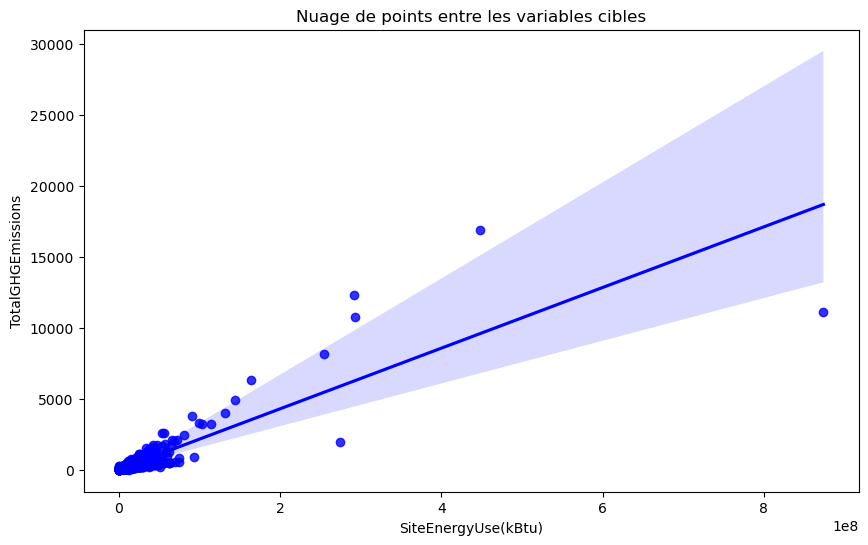

In [29]:
plt.figure(figsize=(10, 6))
sns.regplot(x='SiteEnergyUse(kBtu)', y='TotalGHGEmissions', data=non_residential_df, color='blue')
plt.title('Nuage de points entre les variables cibles')
plt.xlabel('SiteEnergyUse(kBtu)')
plt.ylabel('TotalGHGEmissions')
plt.show()

En effet, grâce à ces différentes visualisations, on se rend compte que nos deux variables cibles semblent être fortement corrélées positivement. Cela veut donc dire, dans notre cas, que lorsque la consommation d'énergie sur le site augmente, les émissions totales de gaz à effet de serre ont tendance à augmenter également, ce qui semble logique.

### Création de nouvelles variables :

Je décide maintentant de rajouter une variable pour avoir l'âge des batiments: 

In [30]:
import datetime

# Création de la variable Age
current_year = datetime.datetime.now().year
non_residential_df['Age'] = current_year - non_residential_df['YearBuilt']

# Vérification :
non_residential_df.describe()

ZipCode  CouncilDistrictCode     Latitude    Longitude  \
count   1668.000000          1668.000000  1668.000000  1668.000000   
mean   97175.651079             4.356715    47.616054  -122.332908   
std     9566.287977             2.191048     0.048168     0.024580   
min        0.000000             1.000000    47.499170  -122.411820   
25%    98104.000000             2.000000    47.585458  -122.343280   
50%    98109.000000             4.000000    47.612340  -122.332935   
75%    98122.000000             7.000000    47.649675  -122.321675   
max    98199.000000             7.000000    47.733870  -122.258640   

         YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count  1668.000000        1668.000000     1668.000000      1.668000e+03   
mean   1961.913669           1.168667        4.121103      1.188427e+05   
std      32.741755           2.929649        6.563407      2.973622e+05   
min    1900.000000           0.000000        0.000000      1.128500e+04   
25%    1930.000000           1.000000        1.000000      2.947775e+04   
50%    1965.000000           1.000000        2.000000      4.928950e+04   
75%    1989.000000           1.000000        4.000000      1.053250e+05   
max    2015.000000         111.000000       99.000000      9.320156e+06   

       PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count         1668.000000            1.668000e+03               1.662000e+03   
mean         12897.979017            1.059447e+05               9.876469e+04   
std          42274.511185            2.842116e+05               2.767111e+05   
min              0.000000            3.636000e+03               5.656000e+03   
25%              0.000000            2.847525e+04               2.552750e+04   
50%              0.000000            4.739150e+04               4.377050e+04   
75%              0.000000            9.475975e+04               9.198375e+04   
max         512608.000000            9.320156e+06               9.320156e+06   

       ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions          Age  
count      1668.000000         1.668000e+03        1668.000000  1668.000000  
mean         65.449726         8.437933e+06         184.973301    62.086331  
std          23.071688         3.022566e+07         751.524770    32.741755  
min           1.000000         0.000000e+00          -0.800000     9.000000  
25%          63.000000         1.231646e+06          20.042500    35.000000  
50%          65.449726         2.557796e+06          49.600000    59.000000  
75%          81.000000         6.928335e+06         143.607500    94.000000  
max         100.000000         8.739237e+08       16870.980000   124.000000

#### Je peux maintenant faire un standar scaler de sorte à faciliter mon travail par la suite.

In [31]:
from sklearn.preprocessing import StandardScaler

# Création de l'instance du StandardScaler
scaler = StandardScaler()

# Sélection des colonnes numériques du DataFrame
colonnes_numeriques = non_residential_df.select_dtypes(include=['float64', 'int64']).columns

# Application du StandardScaler à toutes les colonnes numériques
non_residential_df[colonnes_numeriques] = scaler.fit_transform(non_residential_df[colonnes_numeriques])

# Vérification
non_residential_df.head()

BuildingType PrimaryPropertyType   ZipCode  CouncilDistrictCode  \
0  NonResidential               Hotel  0.096759             1.206764   
1  NonResidential               Hotel  0.096759             1.206764   
2  NonResidential               Hotel  0.096759             1.206764   
3  NonResidential               Hotel  0.096759             1.206764   
4  NonResidential               Hotel  0.098851             1.206764   

  Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
0     DOWNTOWN -0.080040  -0.206828  -1.066654           -0.05759   
1     DOWNTOWN -0.059896  -0.041603   1.041378           -0.05759   
2     DOWNTOWN -0.044113  -0.211304   0.216496           -0.05759   
3     DOWNTOWN -0.040168  -0.151889  -1.097206           -0.05759   
4     DOWNTOWN -0.047851  -0.307753   0.552559           -0.05759   

   NumberofFloors  ...  PropertyGFAParking  PropertyGFABuilding(s)  \
0        1.200788  ...           -0.305192               -0.061630   
1        1.048382  ...            0.051252               -0.061391   
2        5.620550  ...            4.349551                2.299847   
3        0.895977  ...           -0.305192               -0.157060   
4        2.115222  ...            1.161852                0.026873   

   LargestPropertyUseType LargestPropertyUseTypeGFA  ENERGYSTARScore  \
0                   Hotel                 -0.037345        -0.236279   
1                   Hotel                 -0.053808        -0.192923   
2                   Hotel                  2.377665        -0.973334   
3                   Hotel                 -0.135361        -0.409704   
4                   Hotel                  0.089218         0.414063   

   SiteEnergyUse(kBtu)  DefaultData  ComplianceStatus TotalGHGEmissions  \
0            -0.040096        False         Compliant          0.086526   
1            -0.001655        False         Compliant          0.147593   
2             2.122976        False         Compliant          2.534684   
3            -0.054386        False         Compliant          0.135042   
4             0.189786        False         Compliant          0.425978   

        Age  
0  1.066654  
1 -1.041378  
2 -0.216496  
3  1.097206  
4 -0.552559  

[5 rows x 21 columns]

### Mise en place du One hot encoding

In [32]:
# Liste des colonnes à encoder
colonnes_a_encoder = ['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType', 'ComplianceStatus', 'DefaultData']

# Application du One-Hot Encoding
non_residential_df = pd.get_dummies(non_residential_df, columns=colonnes_a_encoder)
print(non_residential_df.columns)

Index(['ZipCode', 'CouncilDistrictCode', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       ...
       'LargestPropertyUseType_Supermarket/Grocery Store',
       'LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient',
       'LargestPropertyUseType_Wholesale Club/Supercenter',
       'LargestPropertyUseType_Worship Facility', 'ComplianceStatus_Compliant',
       'ComplianceStatus_Error - Correct Default Data',
       'ComplianceStatus_Missing Data', 'ComplianceStatus_Non-Compliant',
       'DefaultData_False', 'DefaultData_True'],
      dtype='object', length=123)


In [33]:
non_residential_df

ZipCode  CouncilDistrictCode  Latitude  Longitude  YearBuilt  \
0      0.096759             1.206764 -0.080040  -0.206828  -1.066654   
1      0.096759             1.206764 -0.059896  -0.041603   1.041378   
2      0.096759             1.206764 -0.044113  -0.211304   0.216496   
3      0.096759             1.206764 -0.040168  -0.151889  -1.097206   
4      0.098851             1.206764 -0.047851  -0.307753   0.552559   
...         ...                  ...       ...        ...        ...   
3371 -10.161182            -1.075933 -1.014131   0.869573   0.858071   
3372 -10.161182            -1.075933 -0.411271   0.410119   1.285788   
3373 -10.161182             1.206764  0.423347  -1.014637   0.369252   
3374 -10.161182            -1.532472 -1.821960   0.349889   0.827520   
3375 -10.161182            -1.075933 -1.592071   1.528028  -0.730591   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0              -0.05759        1.200788         -0.102292           -0.305192   
1              -0.05759        1.048382         -0.051390            0.051252   
2              -0.05759        5.620550          2.816492            4.349551   
3              -0.05759        0.895977         -0.193501           -0.305192   
4              -0.05759        2.115222          0.190859            1.161852   
...                 ...             ...               ...                 ...   
3371           -0.05759       -0.475674         -0.358420           -0.305192   
3372           -0.05759       -0.475674         -0.345954           -0.305192   
3373           -0.05759       -0.475674         -0.355517           -0.305192   
3374           -0.05759       -0.475674         -0.352342           -0.305192   
3375           -0.05759       -0.475674         -0.338358           -0.305192   

      PropertyGFABuilding(s)  ...  \
0                  -0.061630  ...   
1                  -0.061391  ...   
2                   2.299847  ...   
3                  -0.157060  ...   
4                   0.026873  ...   
...                      ...  ...   
3371               -0.329609  ...   
3372               -0.316566  ...   
3373               -0.326572  ...   
3374               -0.323250  ...   
3375               -0.308619  ...   

      LargestPropertyUseType_Supermarket/Grocery Store  \
0                                                    0   
1                                                    0   
2                                                    0   
3                                                    0   
4                                                    0   
...                                                ...   
3371                                                 0   
3372                                                 0   
3373                                                 0   
3374                                                 0   
3375                                                 0   

      LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient  \
0                                                     0            
1                                                     0            
2                                                     0            
3                                                     0            
4                                                     0            
...                                                 ...            
3371                                                  0            
3372                                                  0            
3373                                                  0            
3374                                                  0            
3375                                                  0            

      LargestPropertyUseType_Wholesale Club/Supercenter  \
0                                                     0   
1                                                     0   
2                                 

In [34]:
# Remplacement des NaN par la valeur la plus fréquente de chaque colonne
non_residential_df = non_residential_df.fillna(non_residential_df.mode().iloc[0])

In [35]:
# Création de mon nouveau fichier que je vais pouvoir utiliser dans mes autres notebooks
non_residential_df.to_csv("non_residential_df.csv", index=False)

#### Je décide maintenant de créer tous les histogrammes possible de sortes à encore une fois mieux comprendre et visualiser mes données une fois traitées.

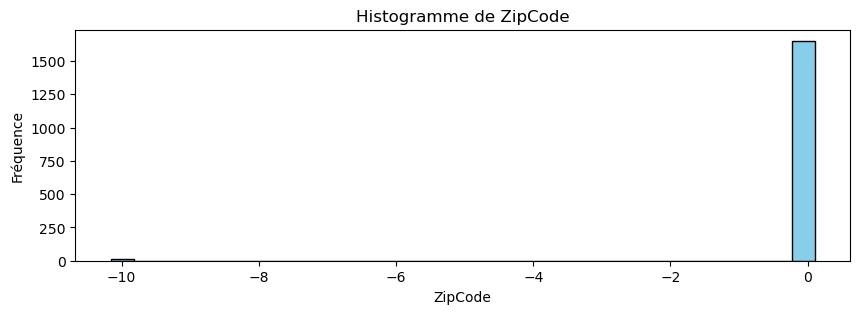

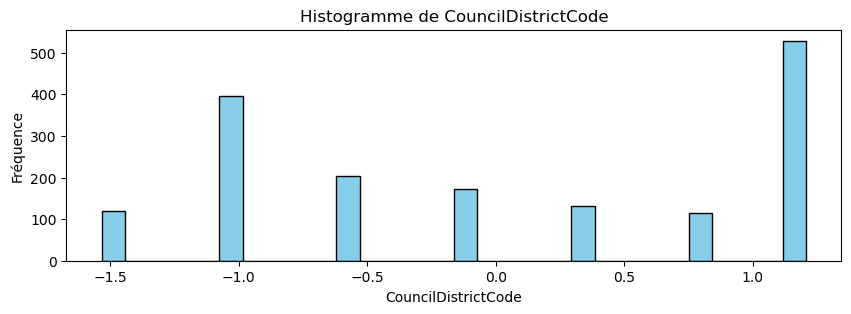

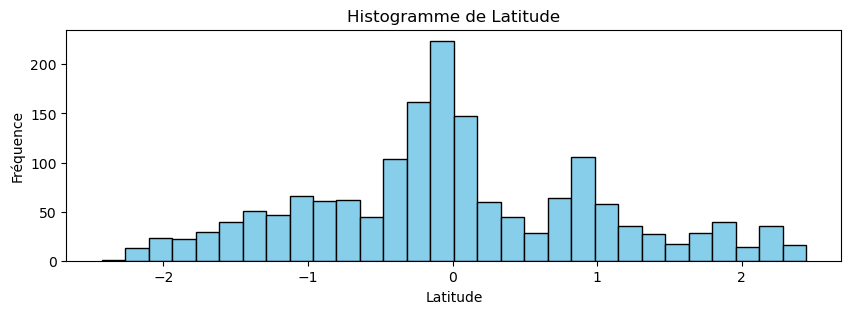

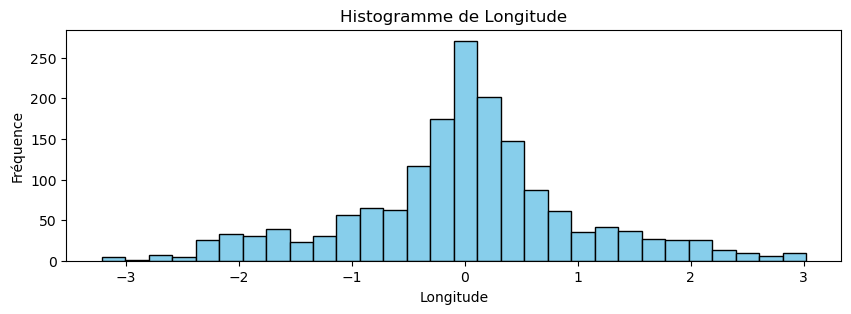

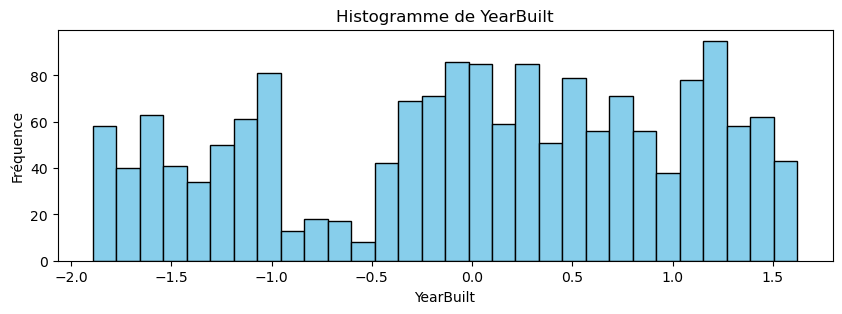

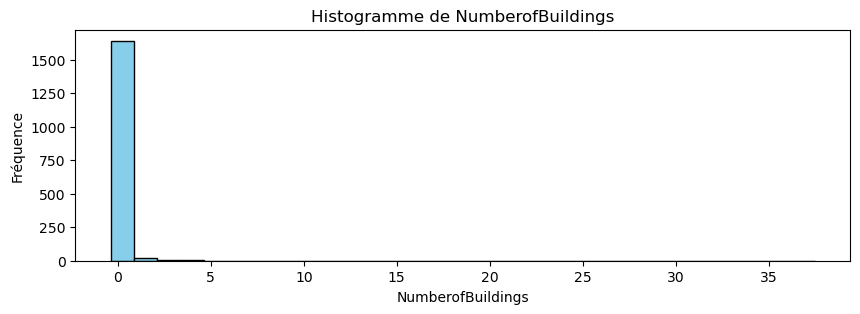

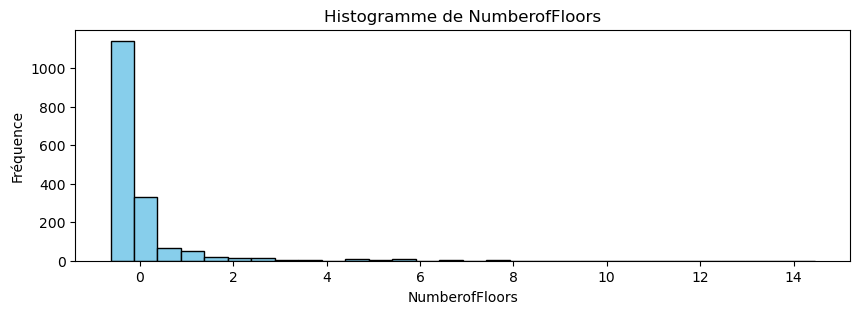

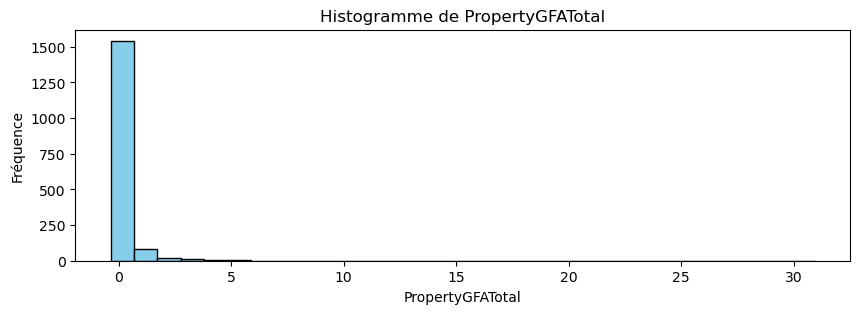

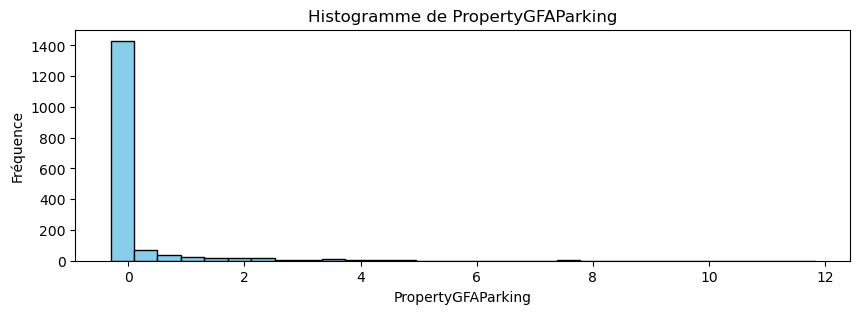

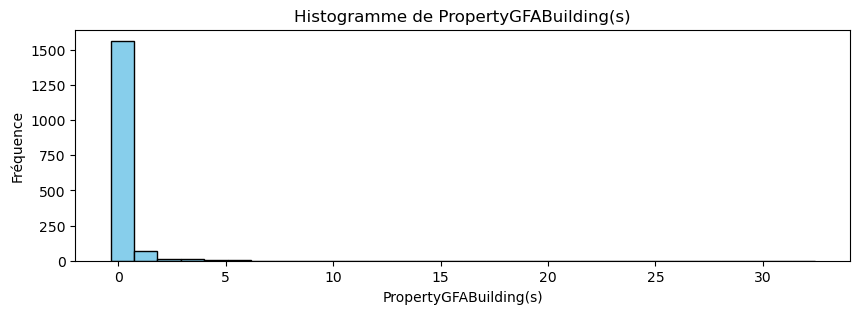

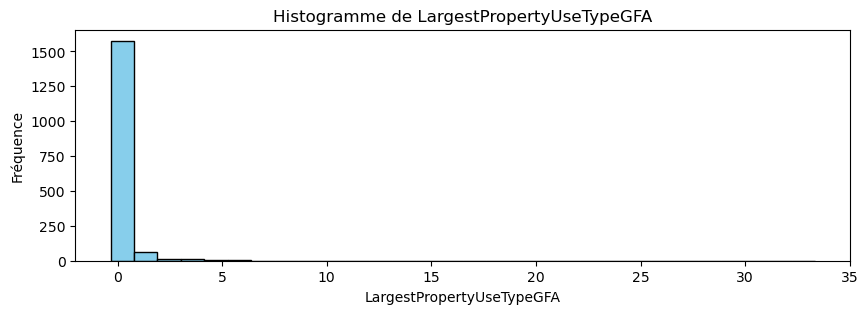

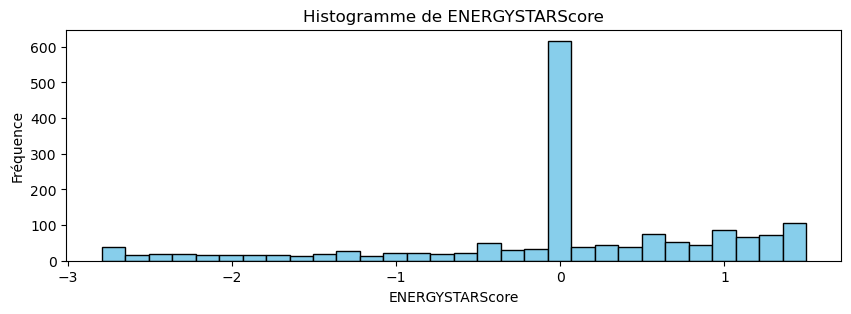

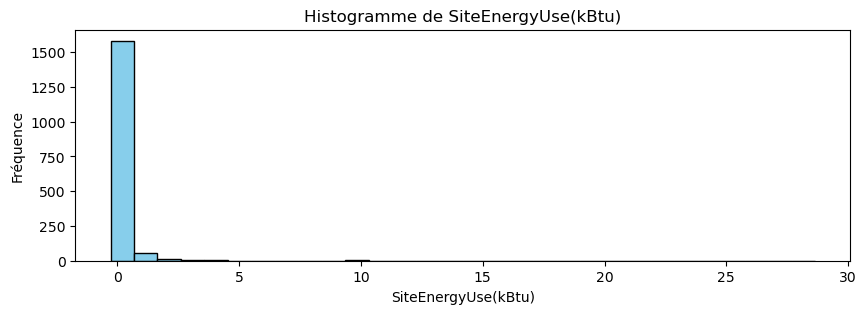

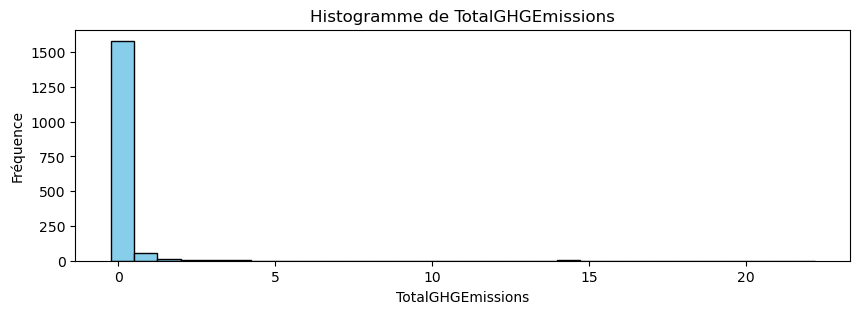

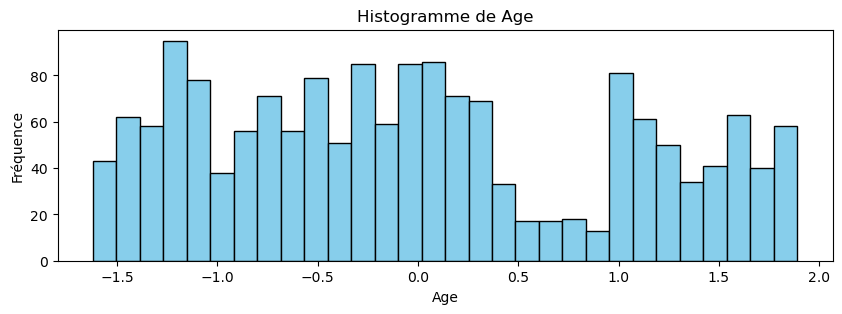

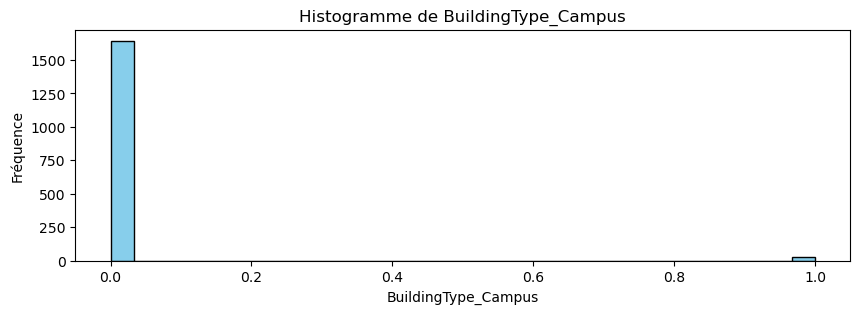

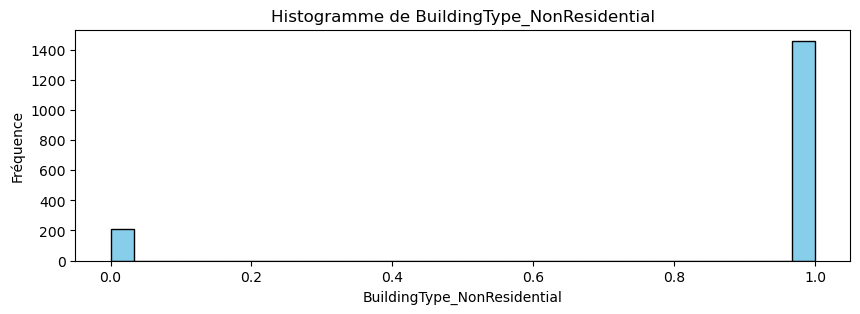

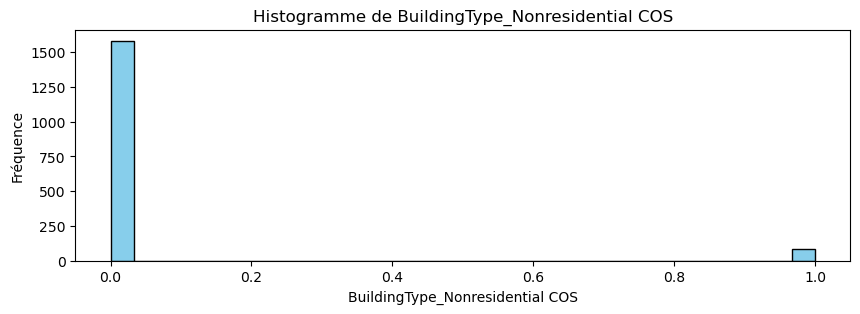

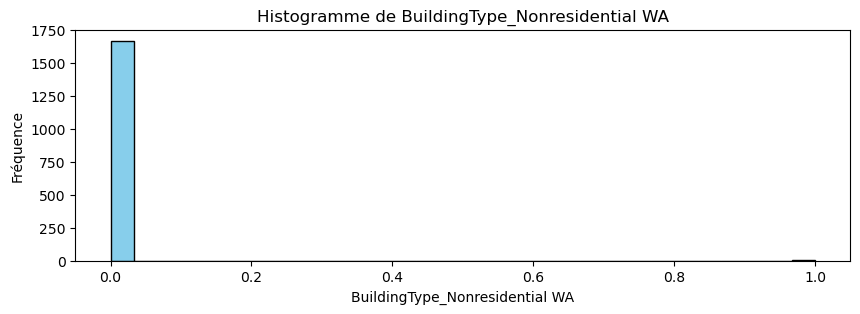

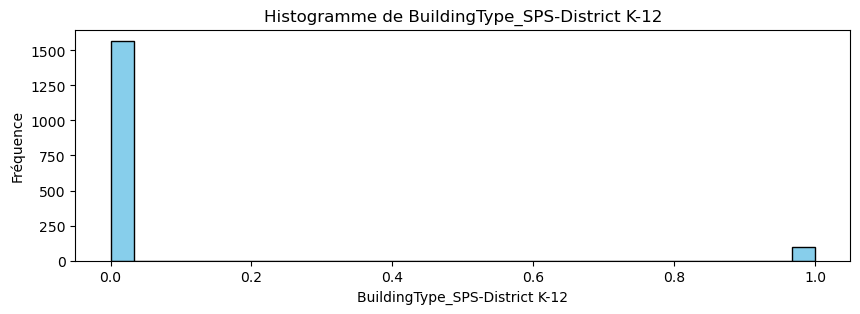

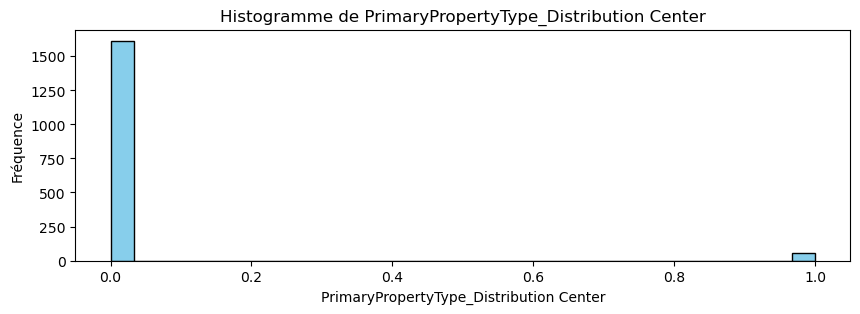

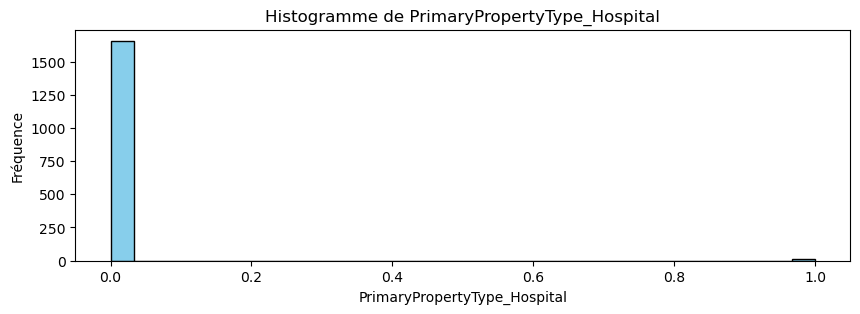

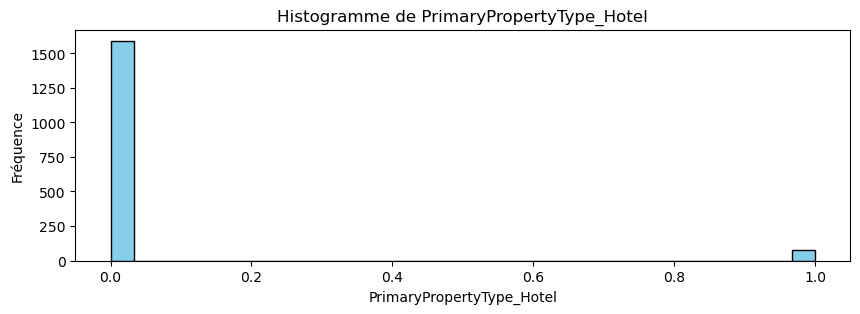

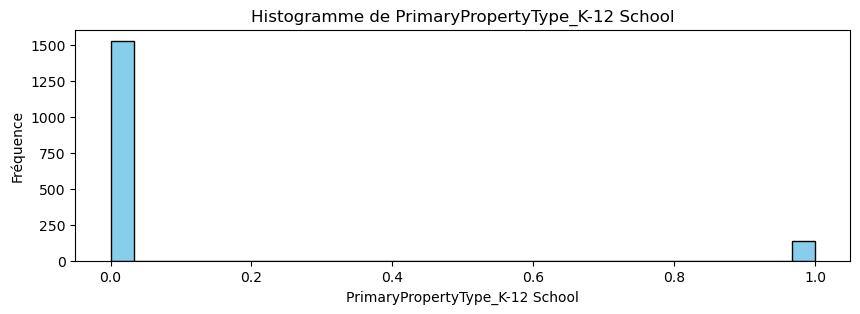

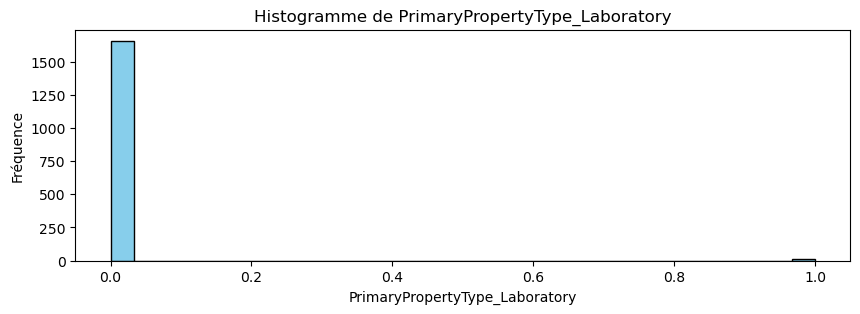

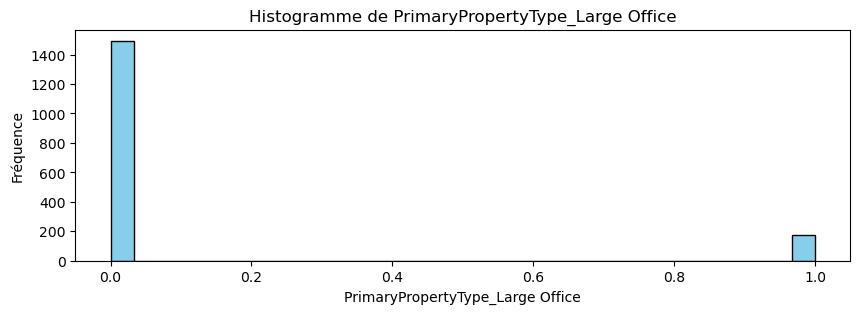

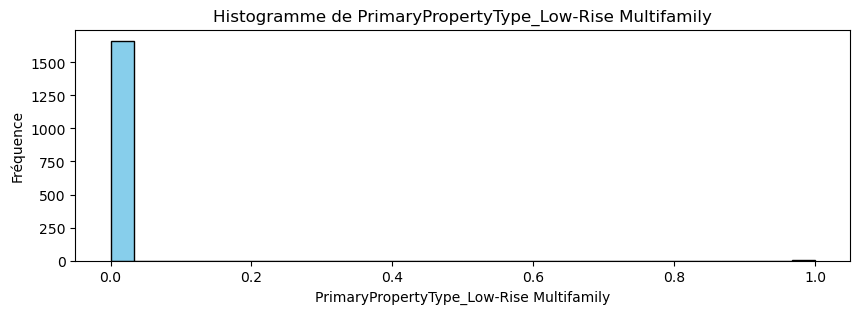

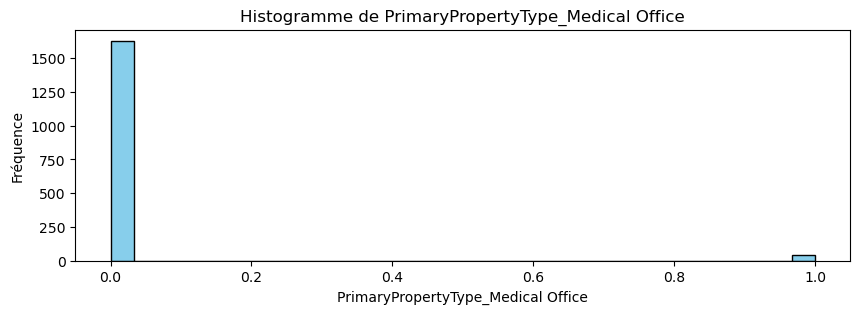

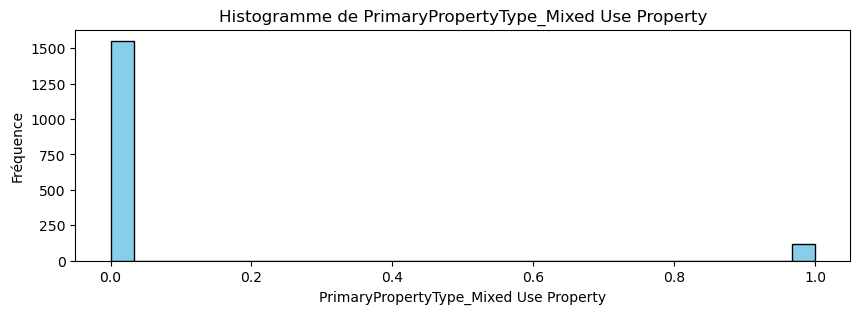

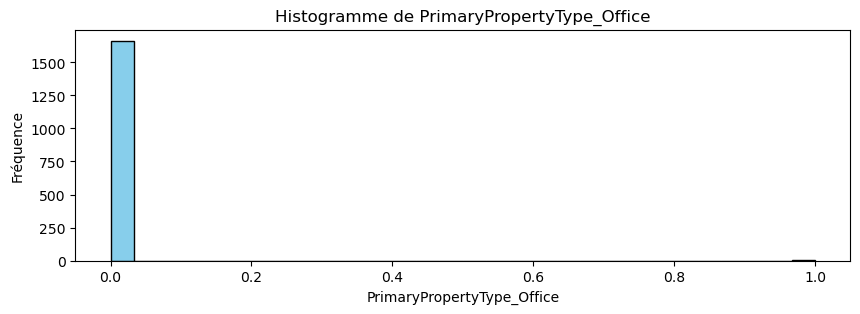

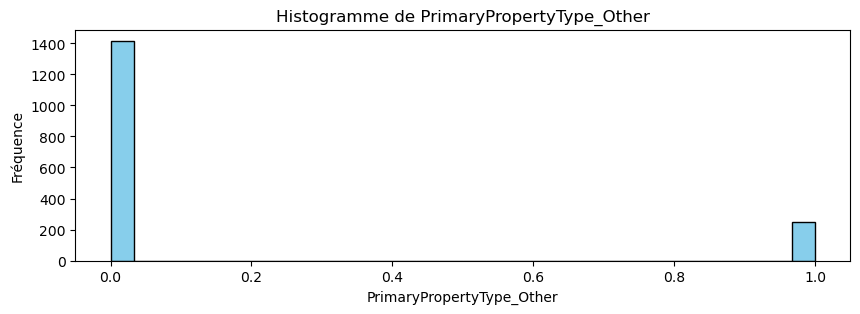

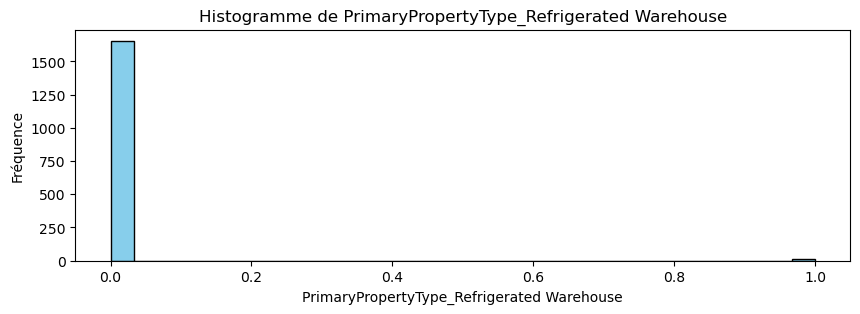

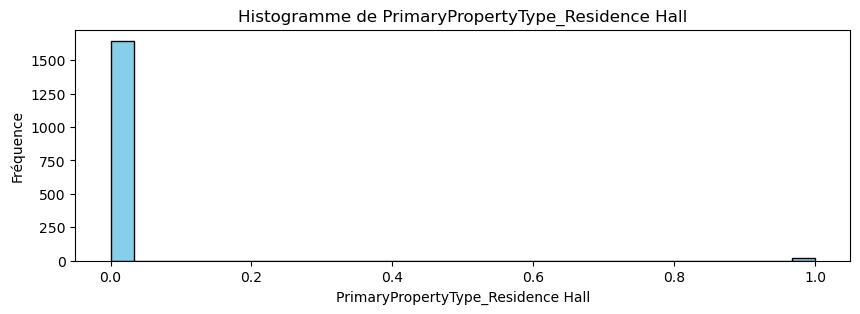

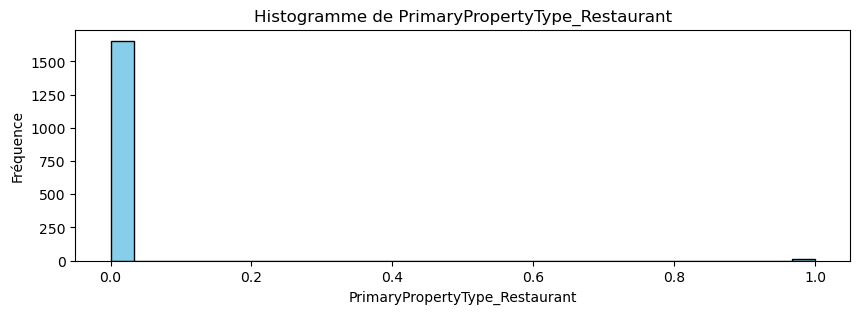

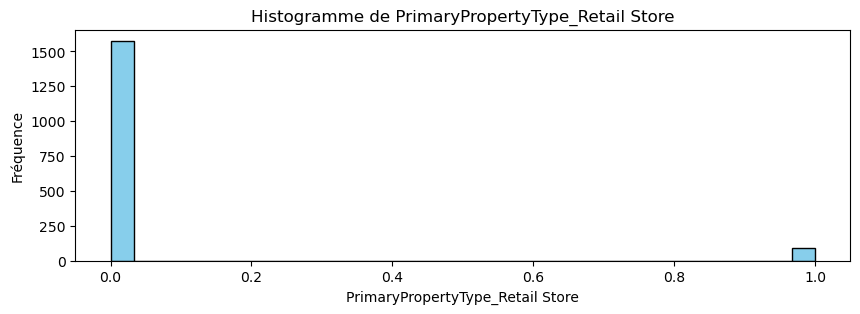

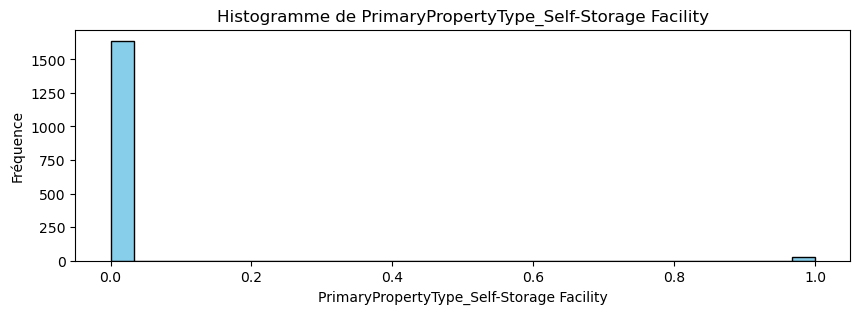

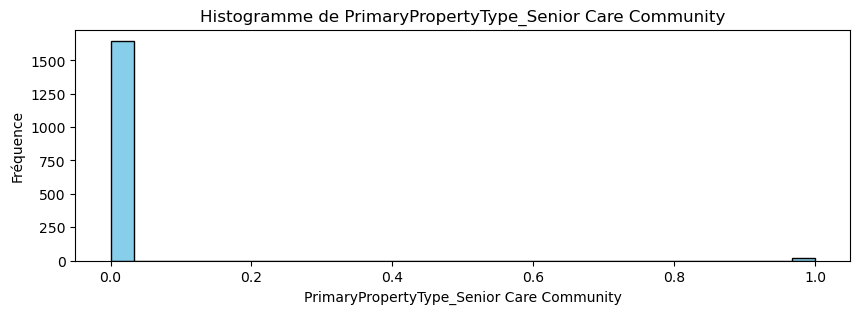

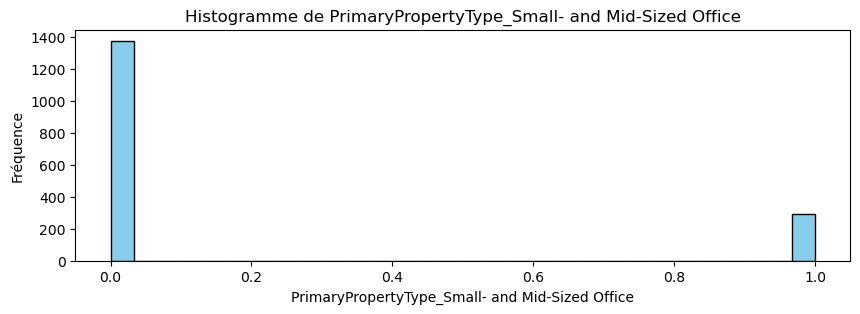

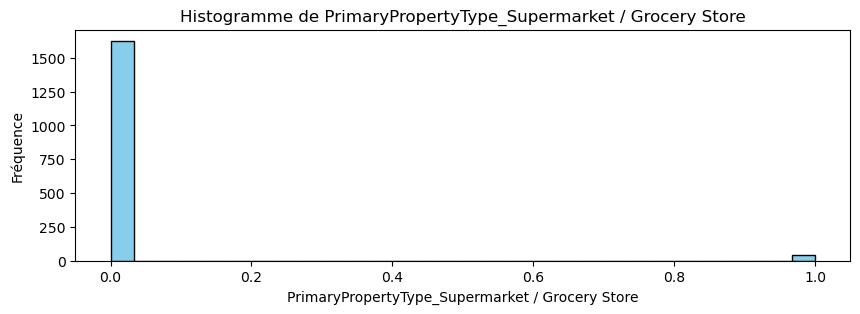

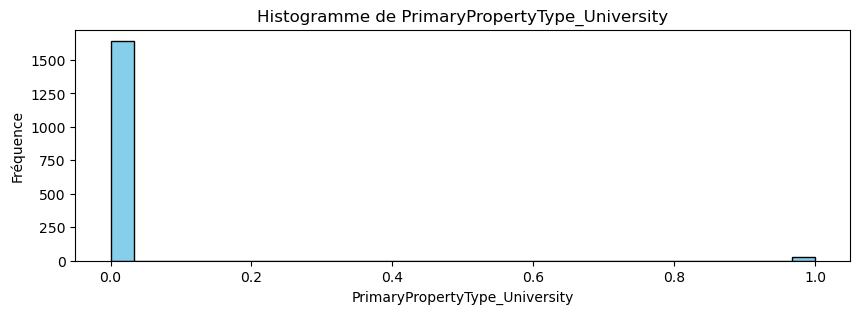

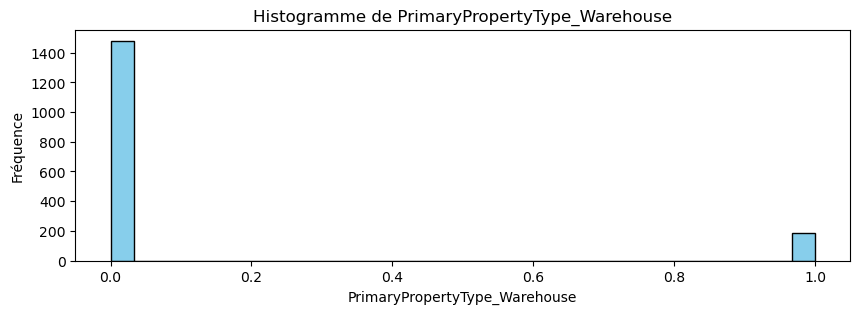

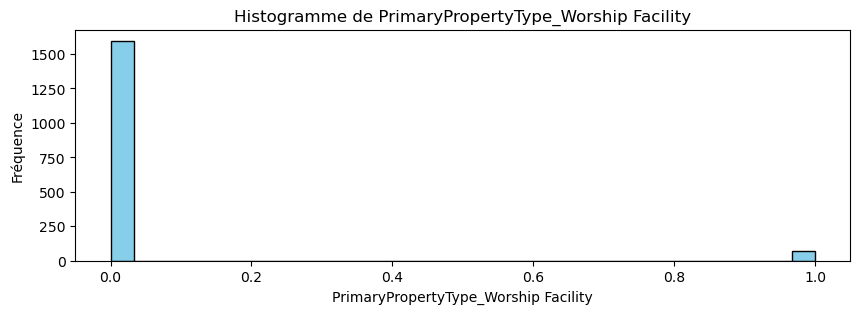

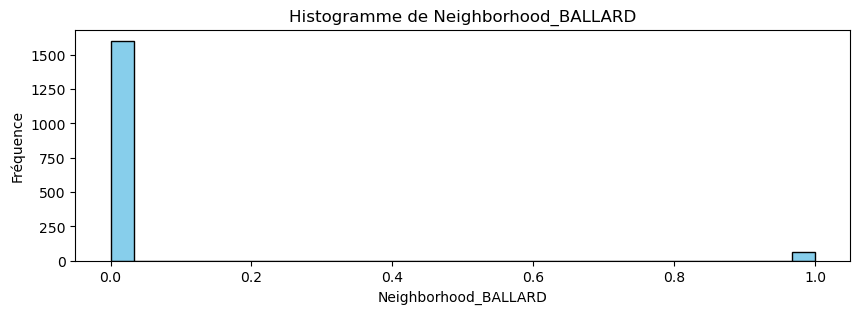

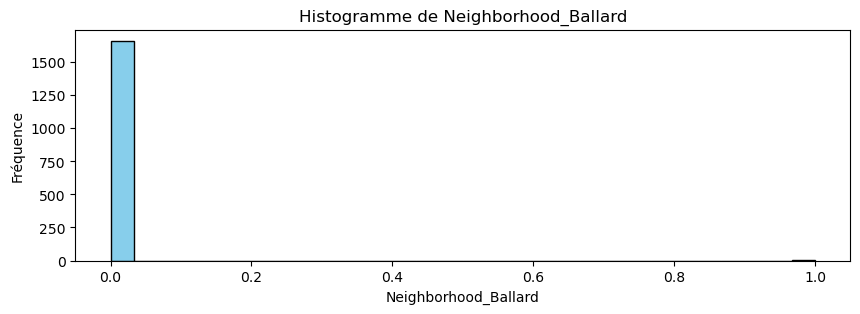

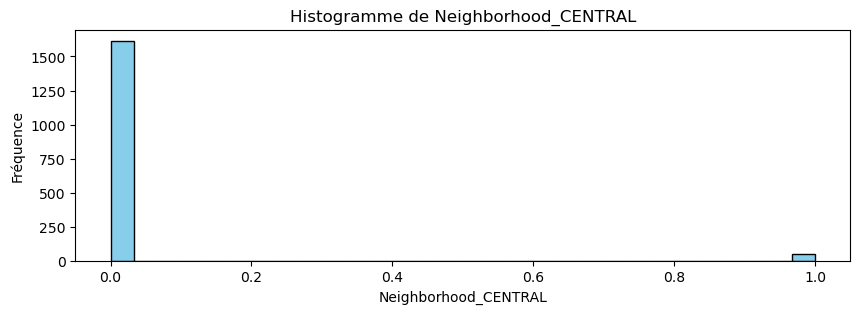

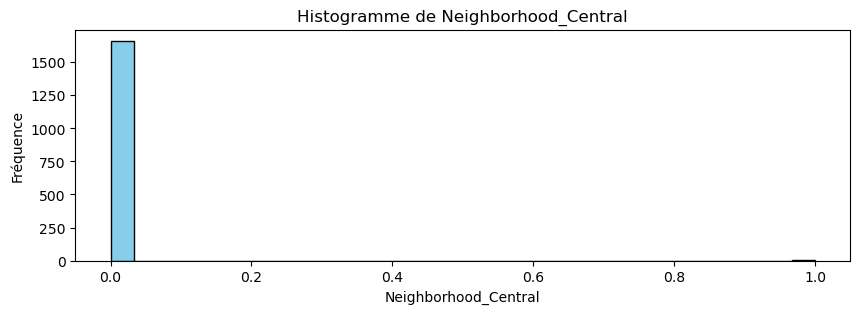

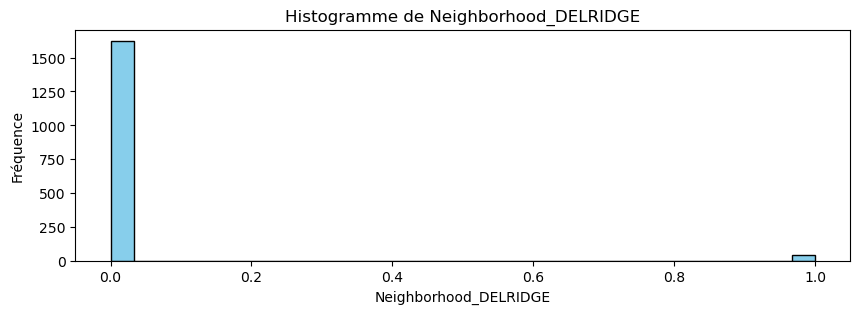

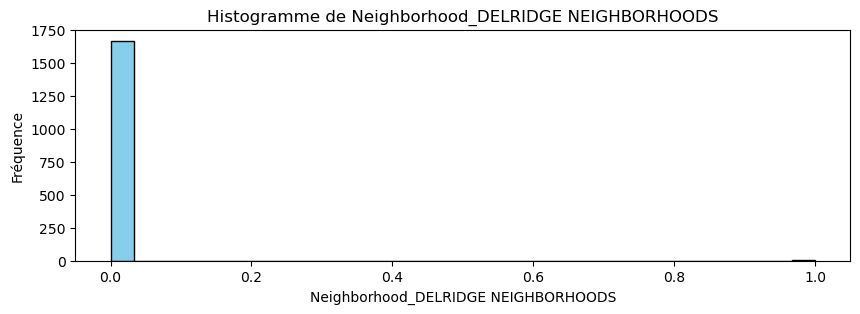

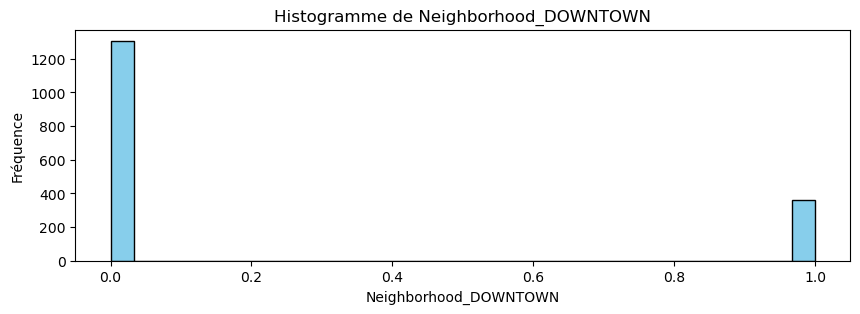

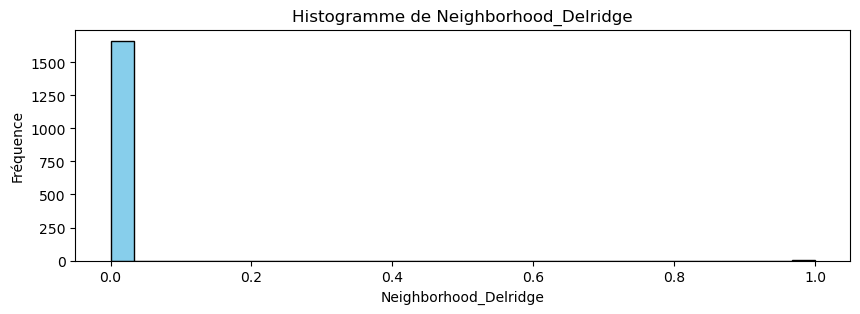

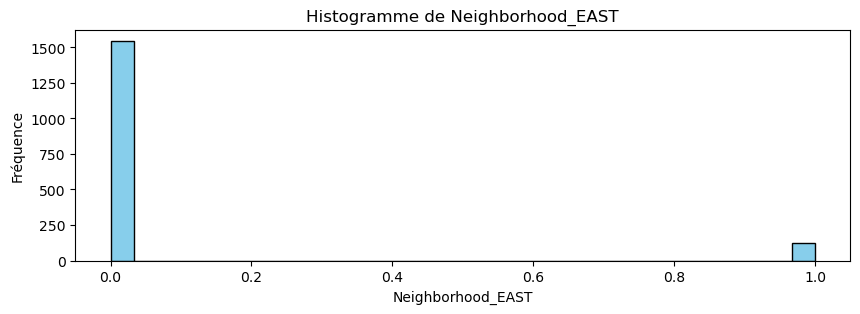

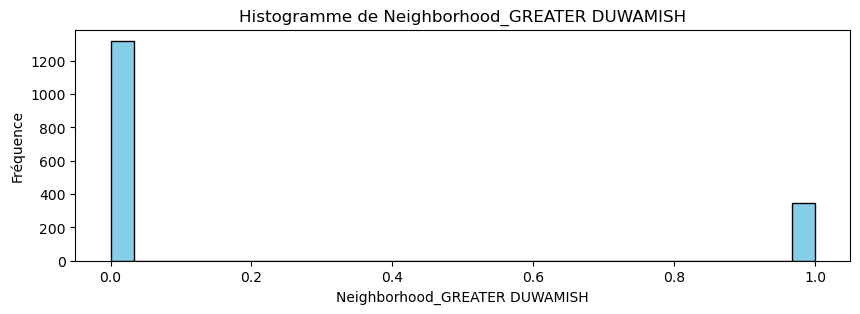

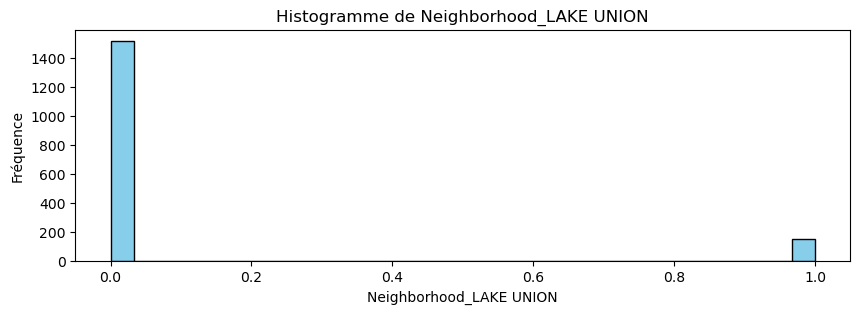

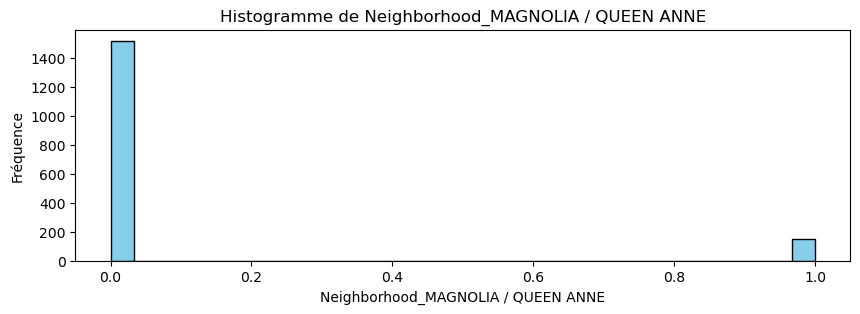

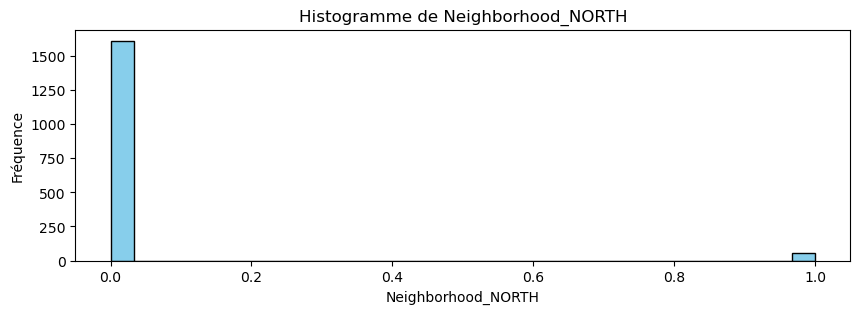

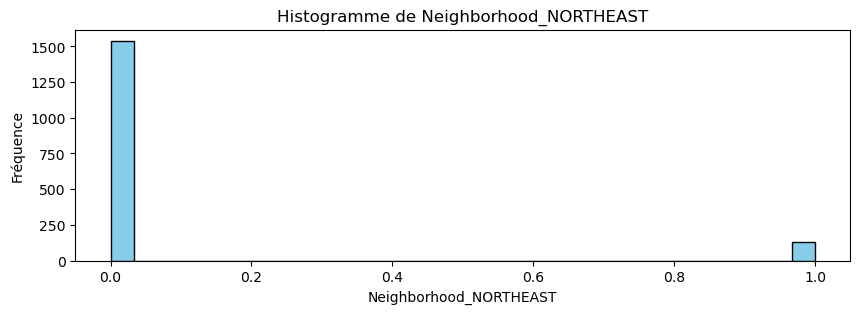

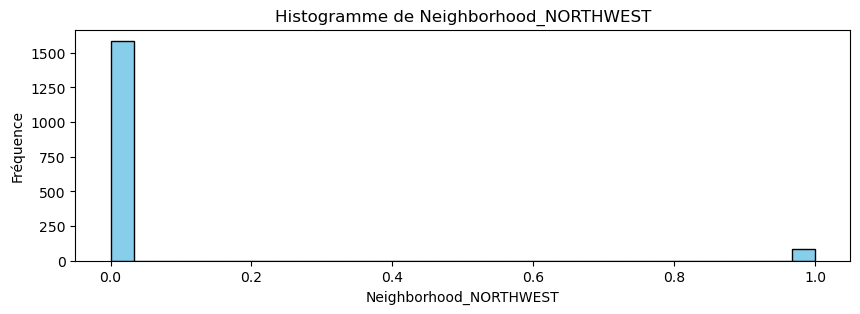

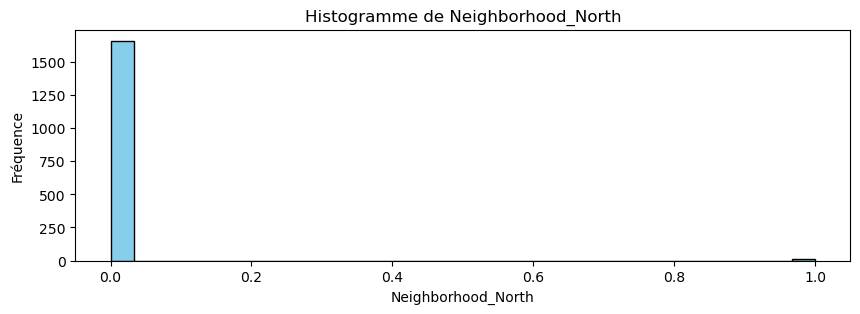

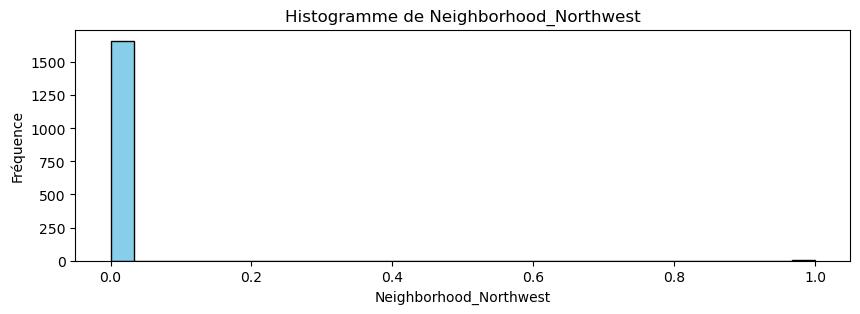

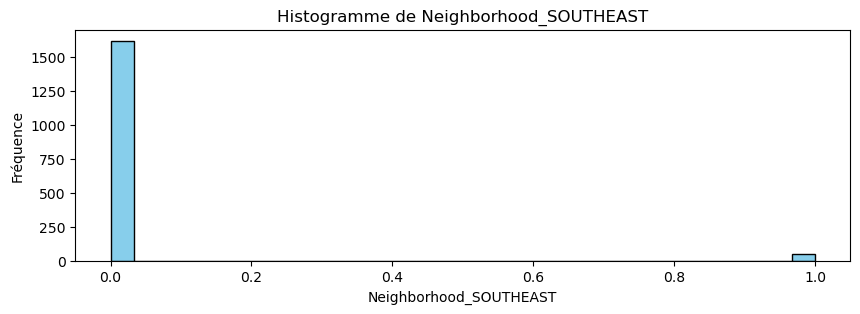

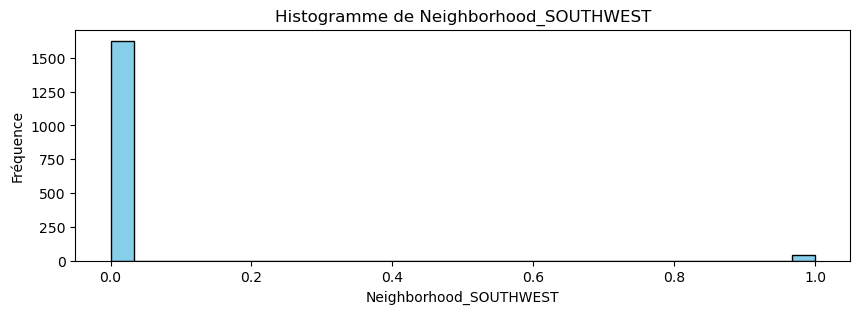

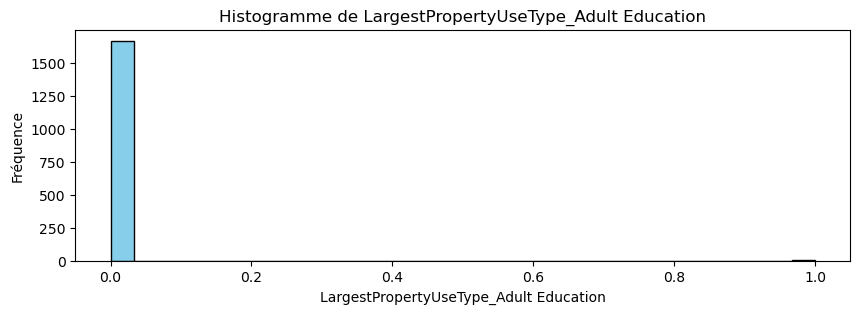

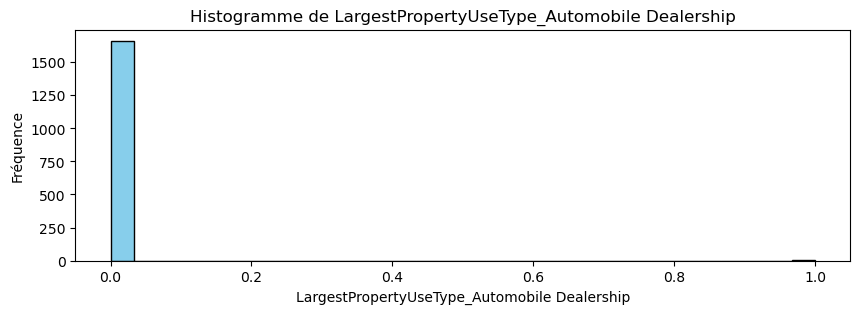

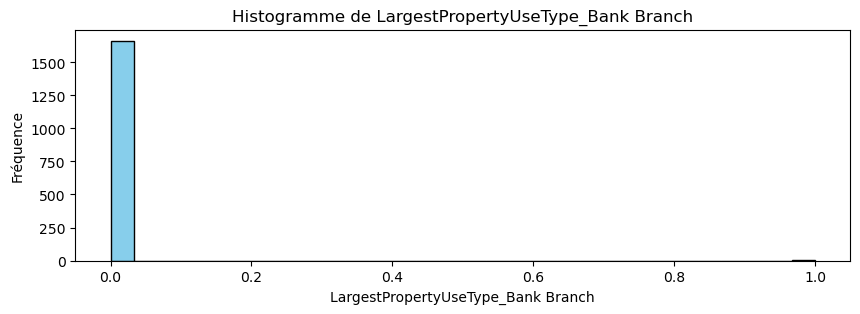

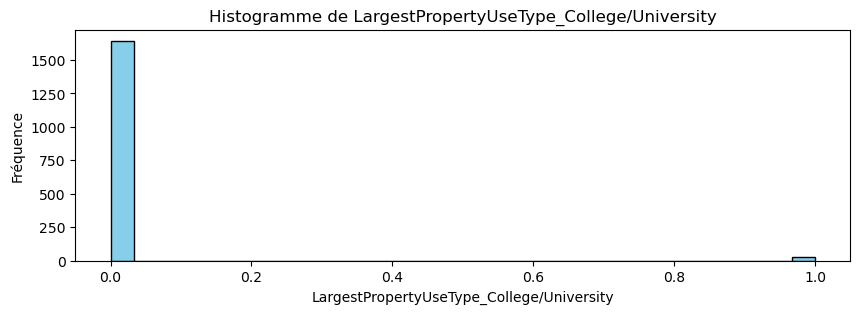

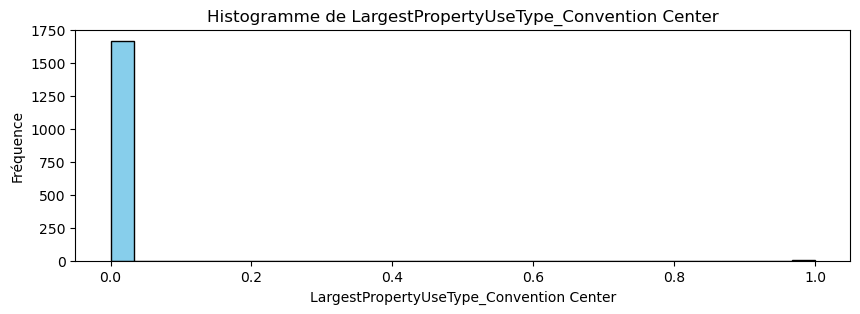

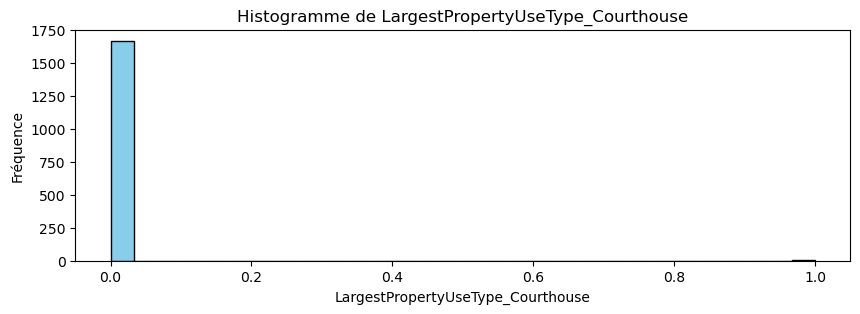

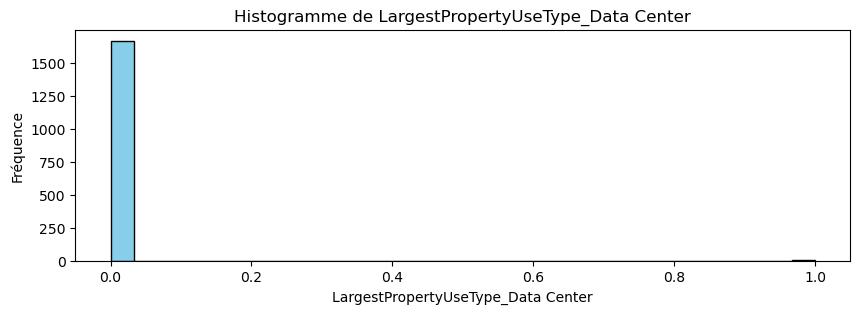

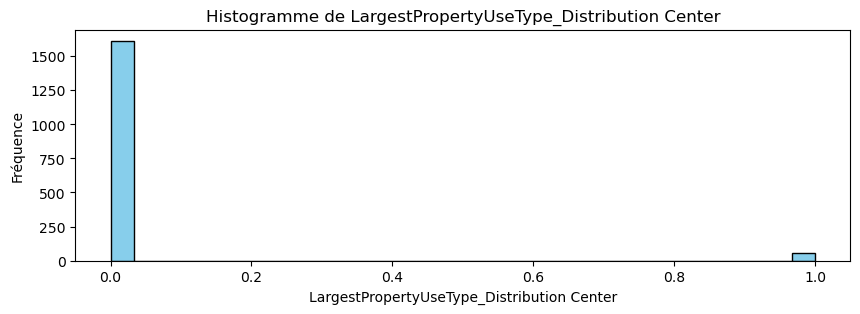

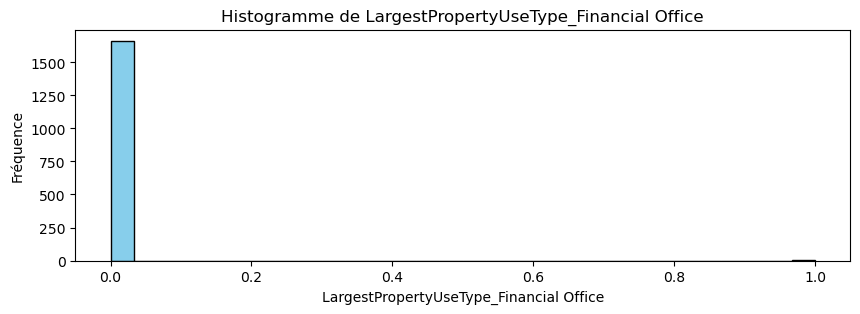

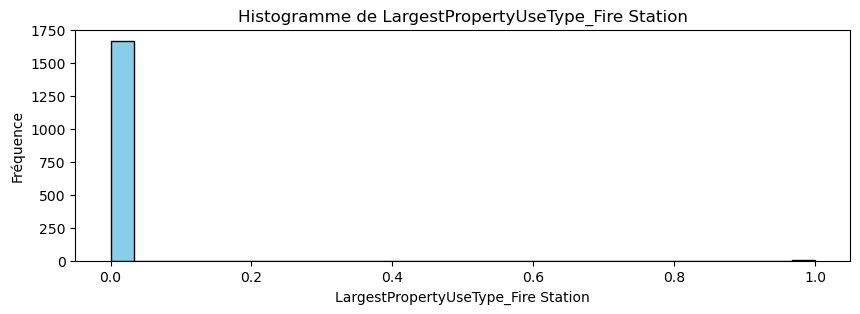

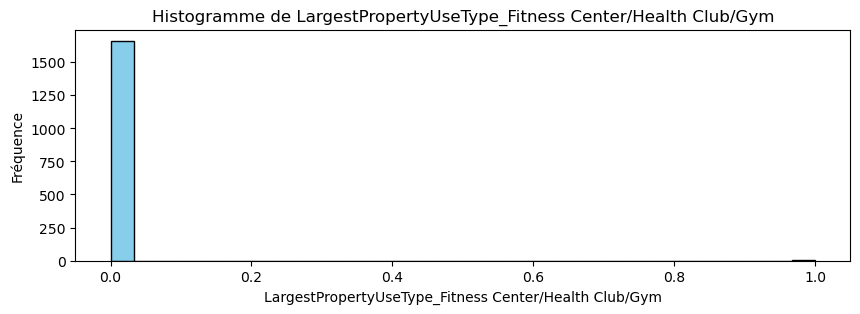

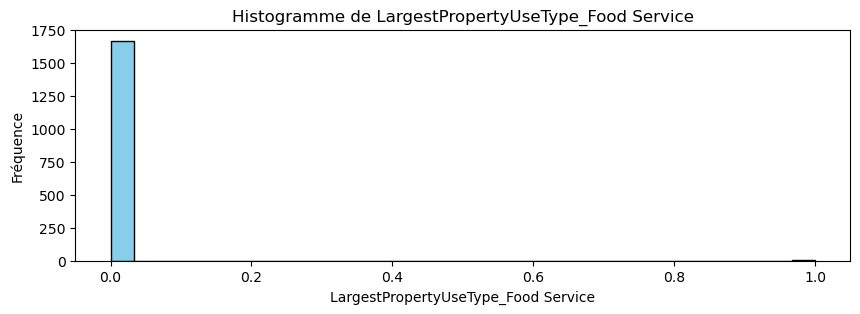

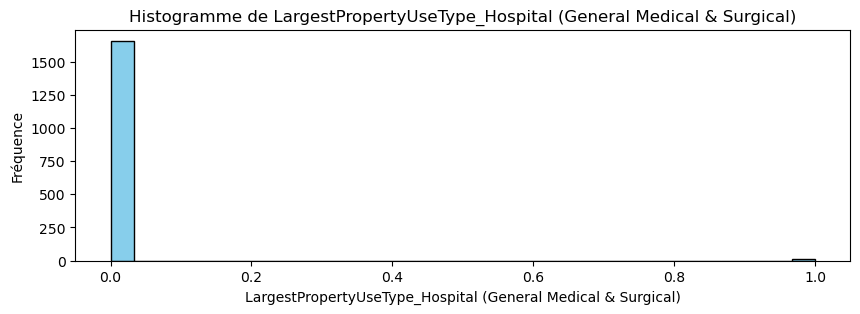

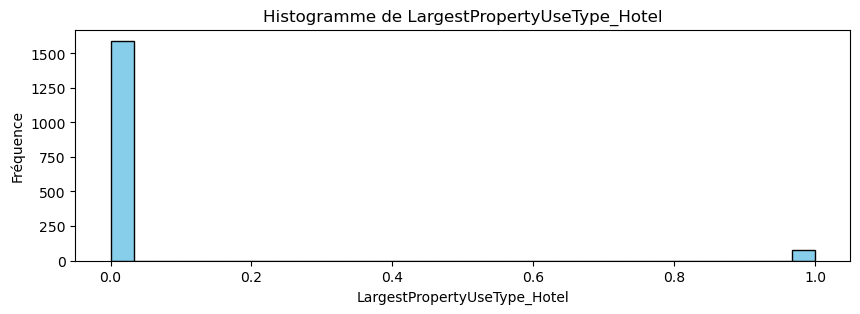

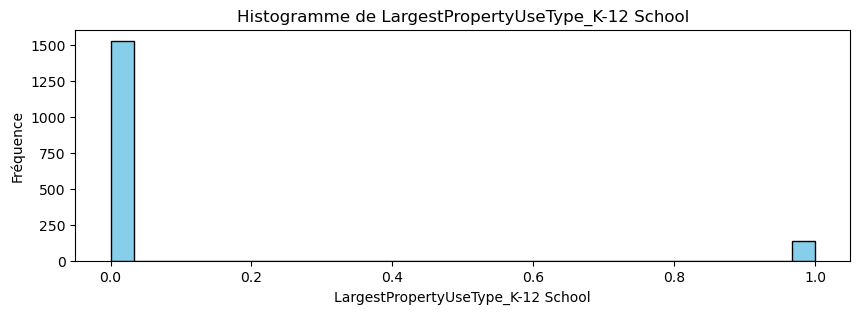

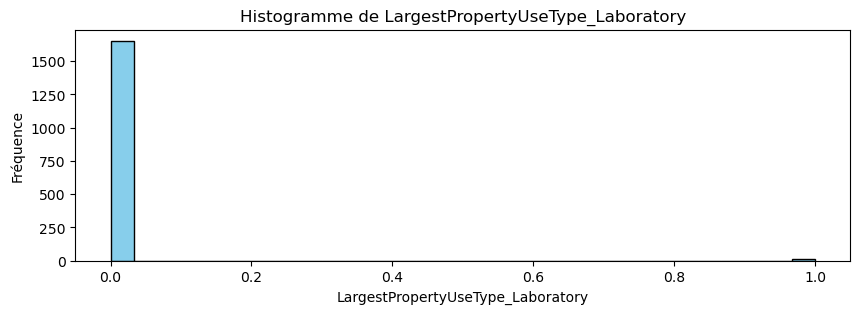

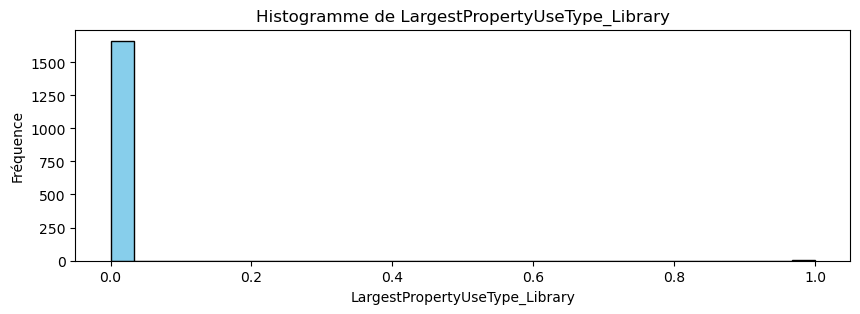

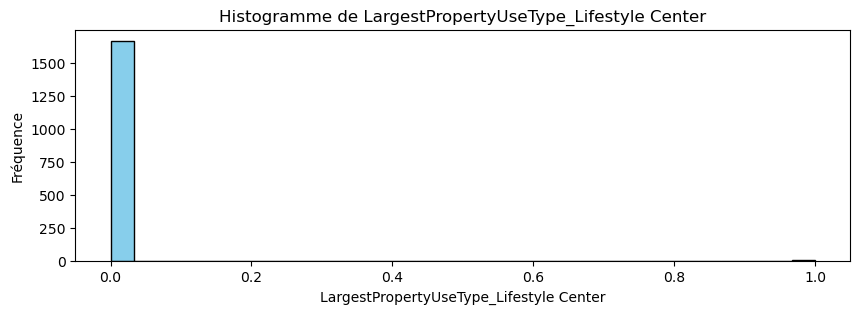

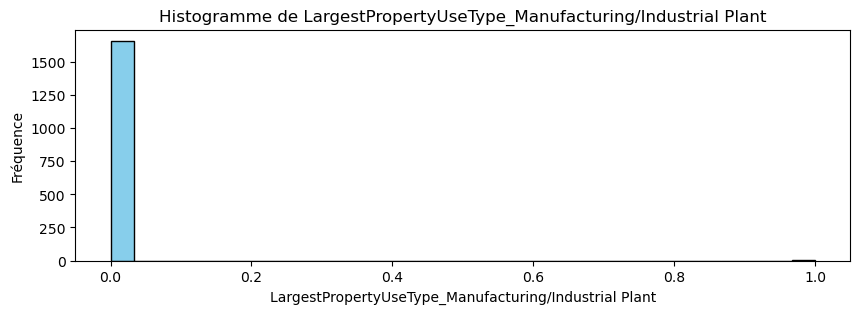

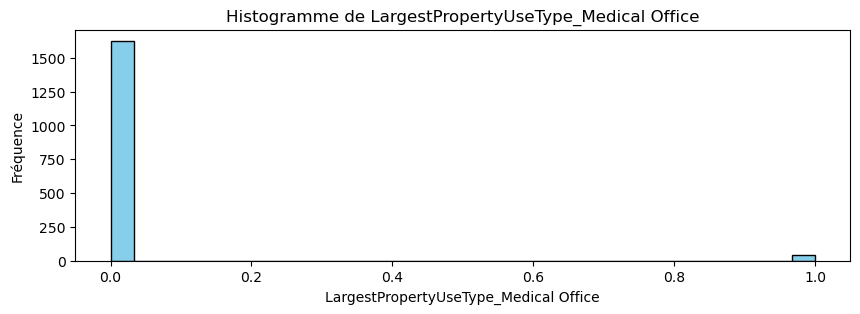

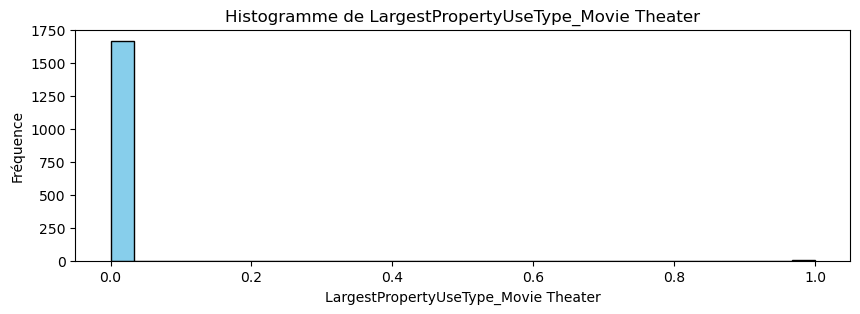

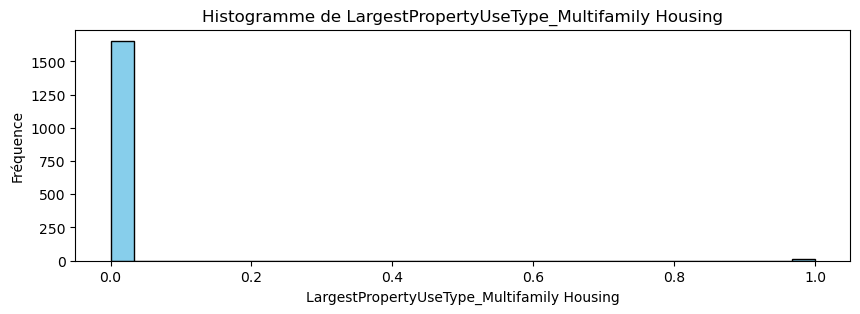

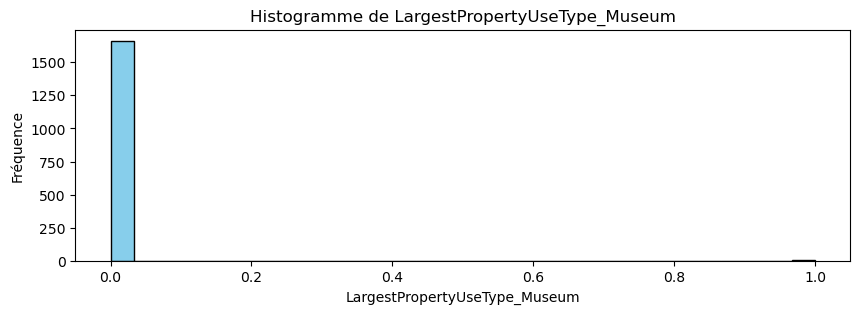

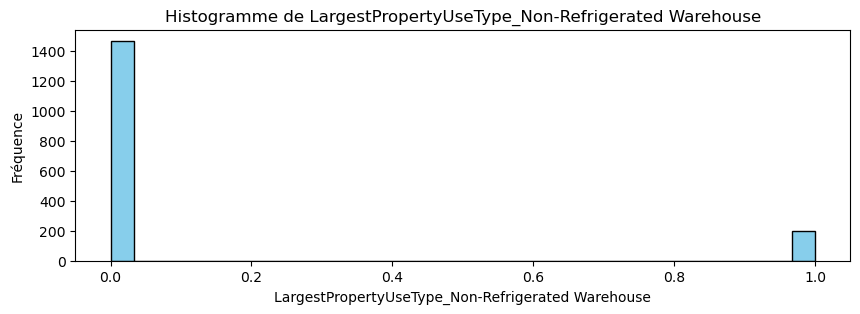

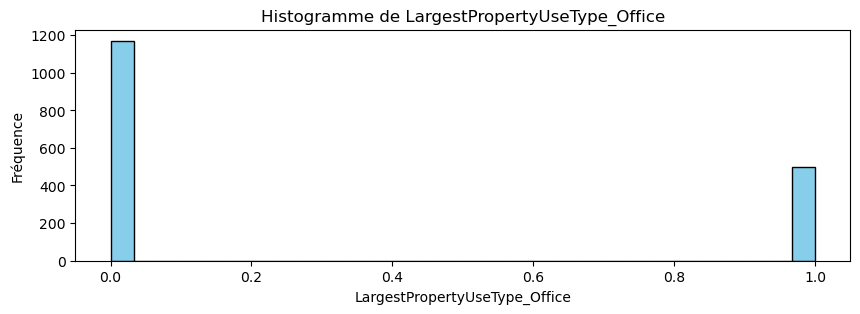

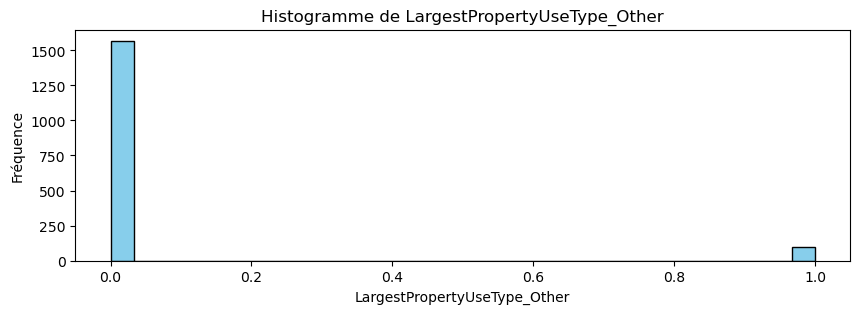

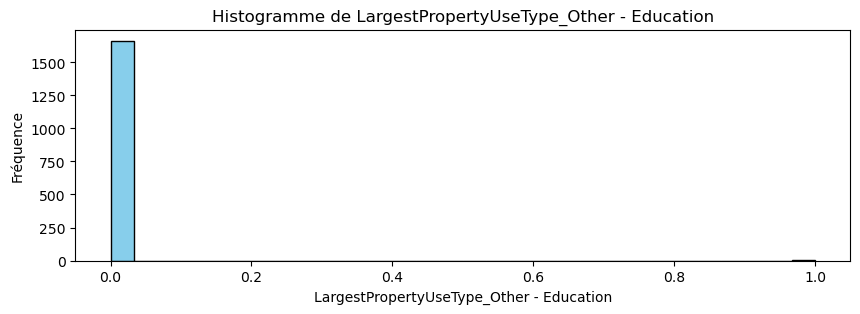

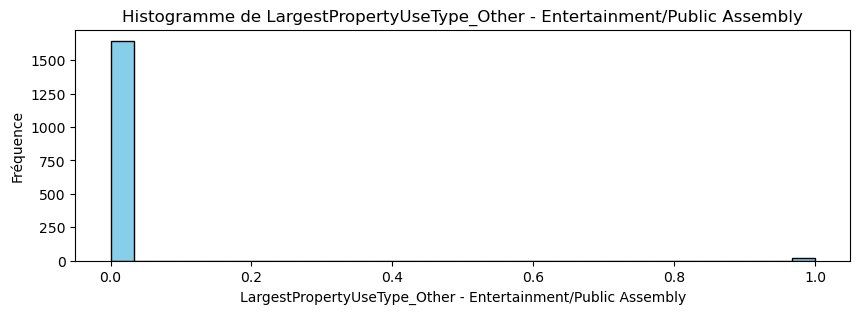

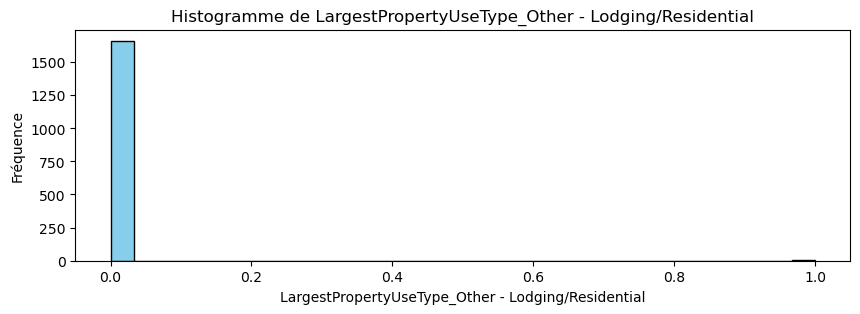

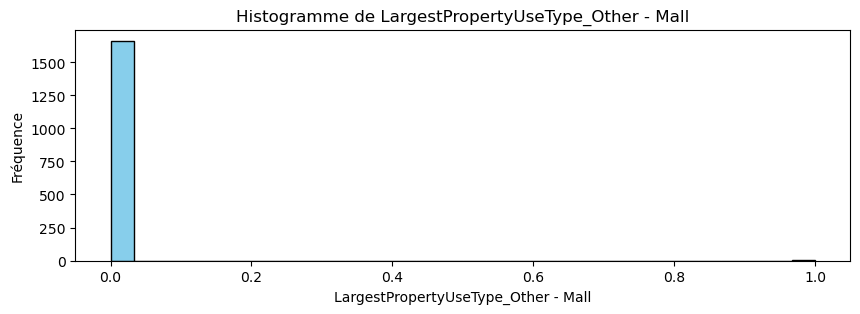

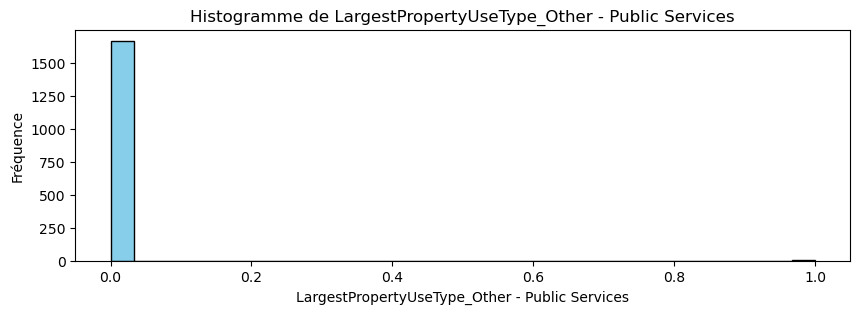

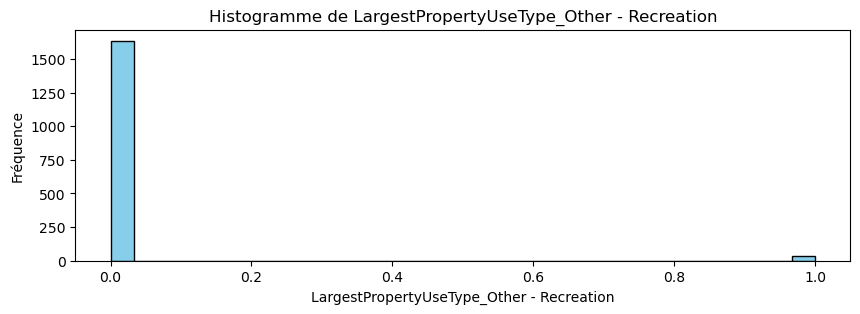

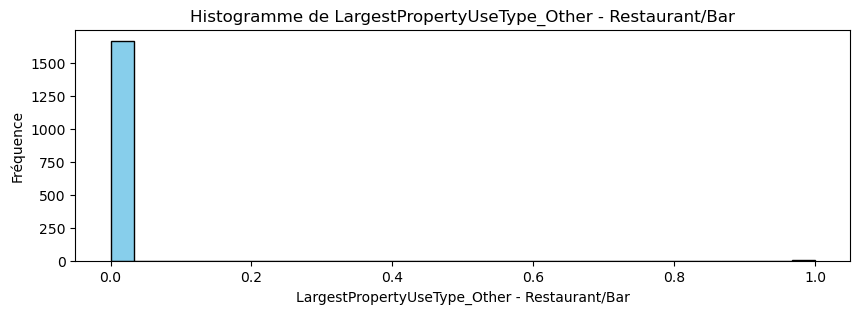

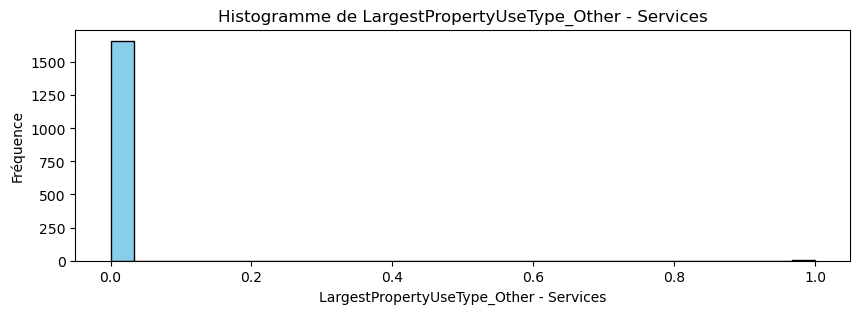

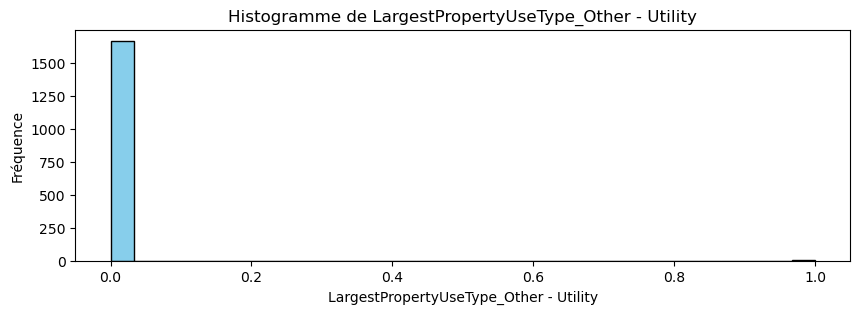

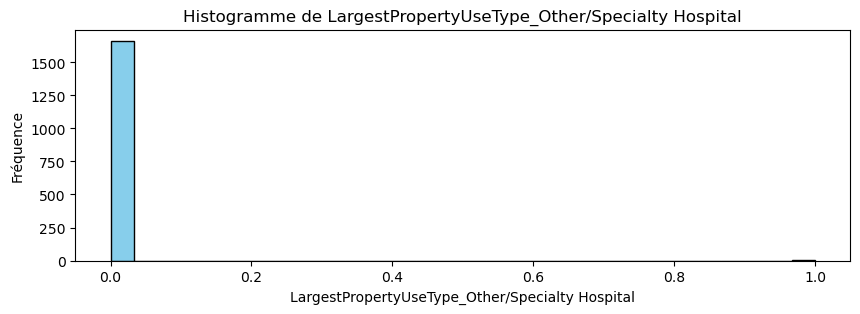

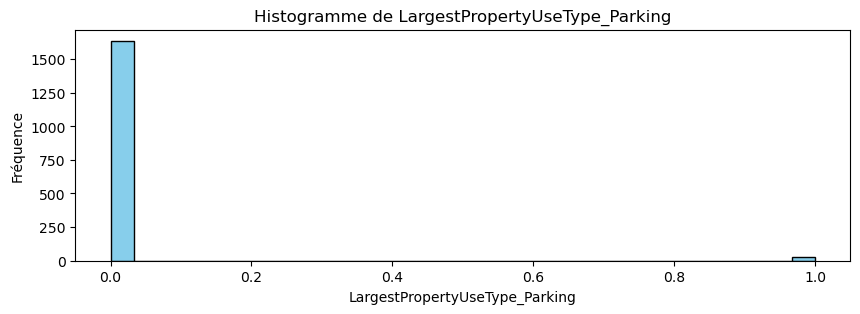

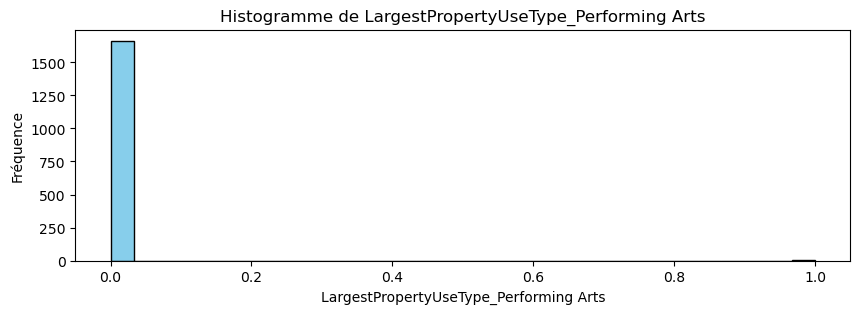

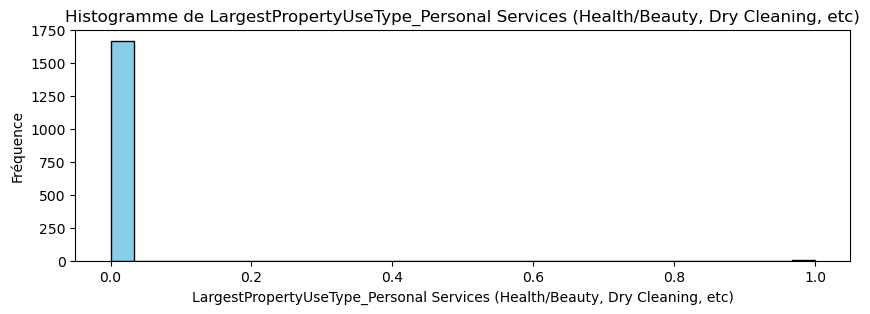

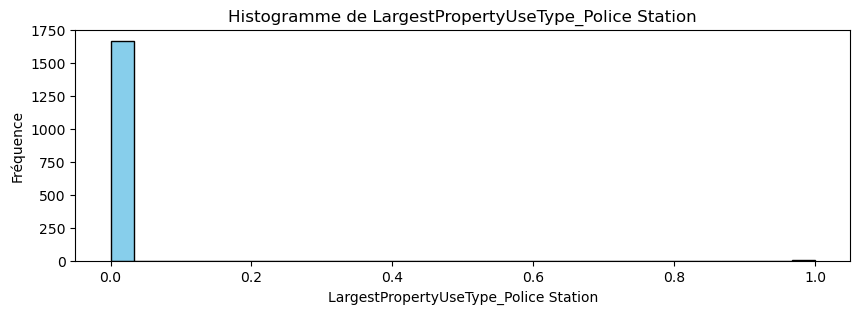

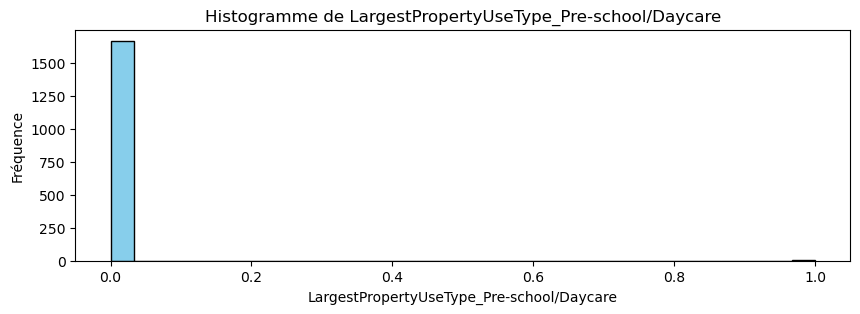

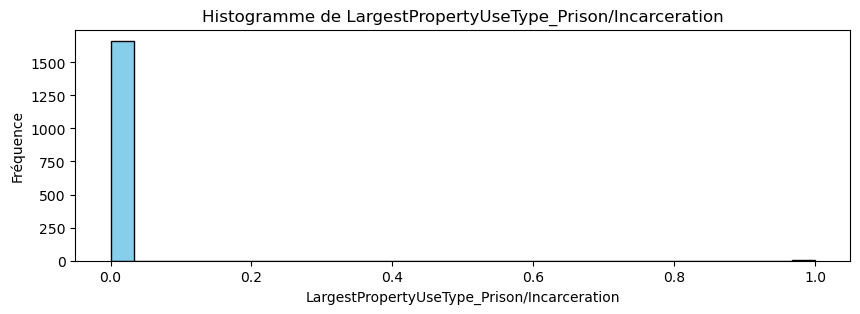

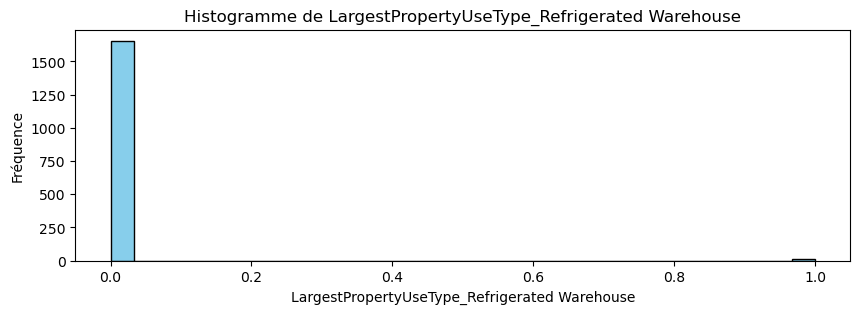

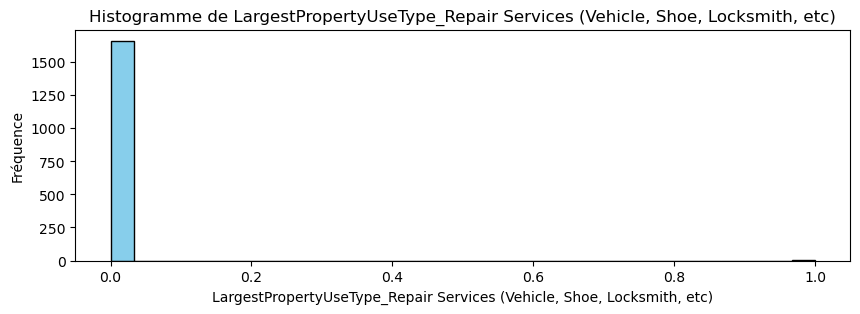

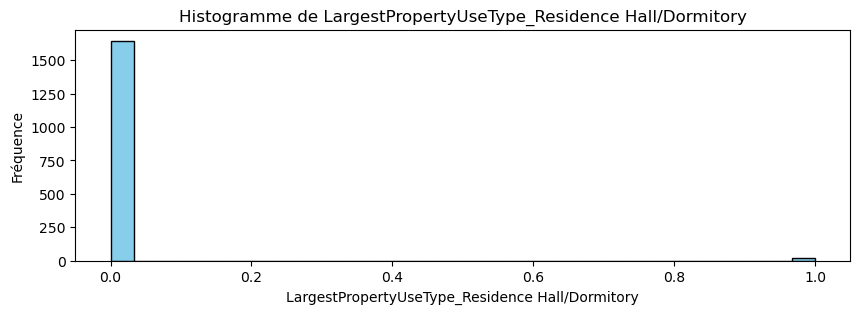

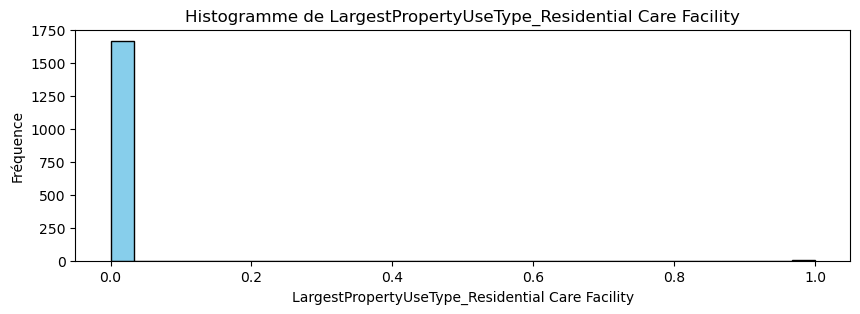

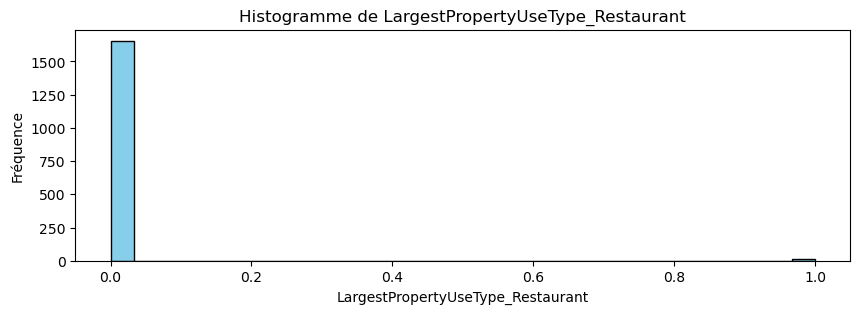

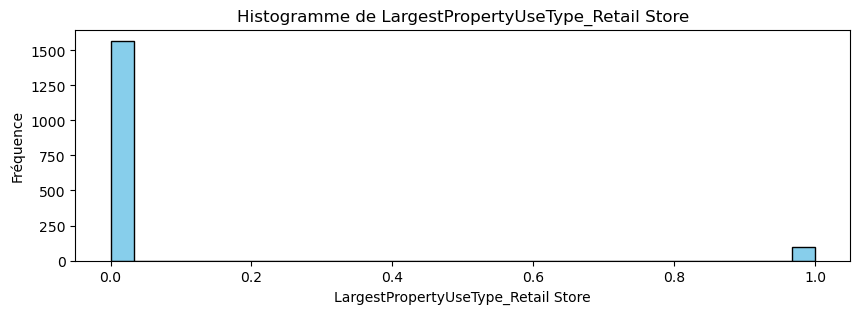

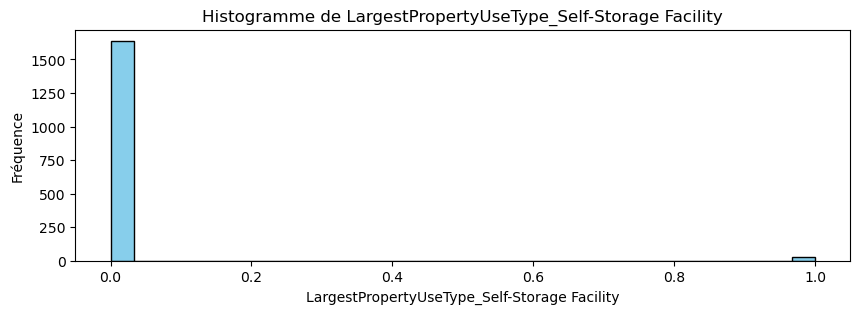

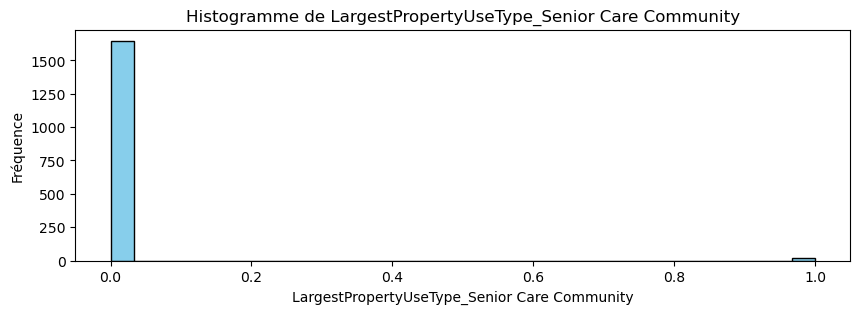

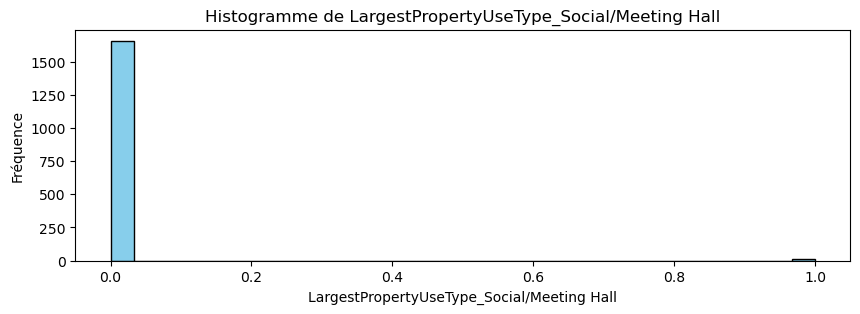

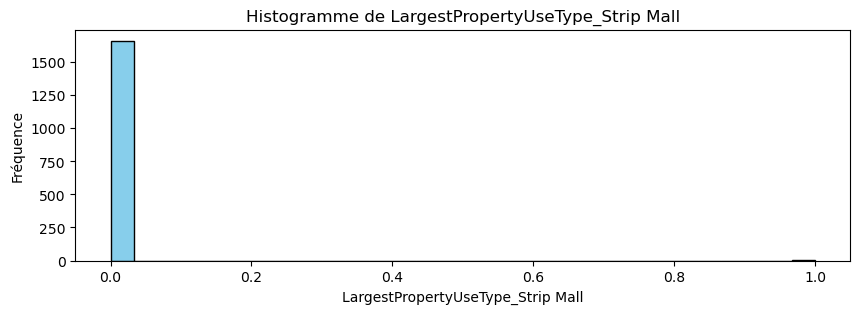

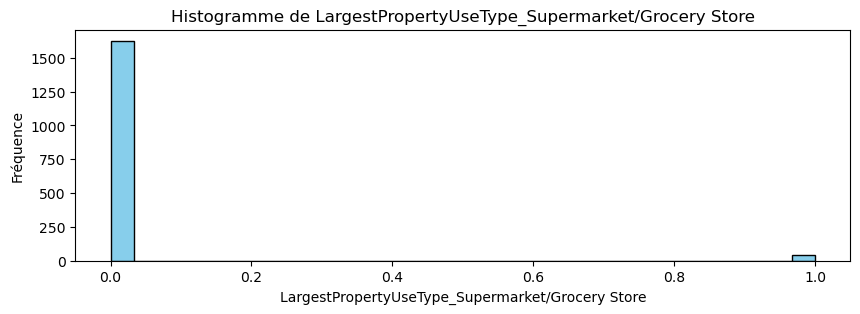

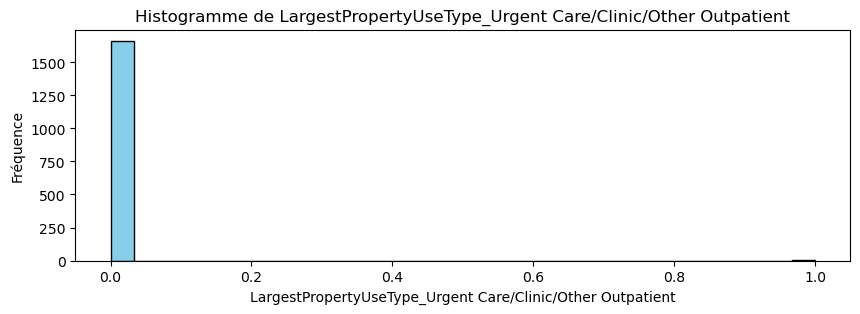

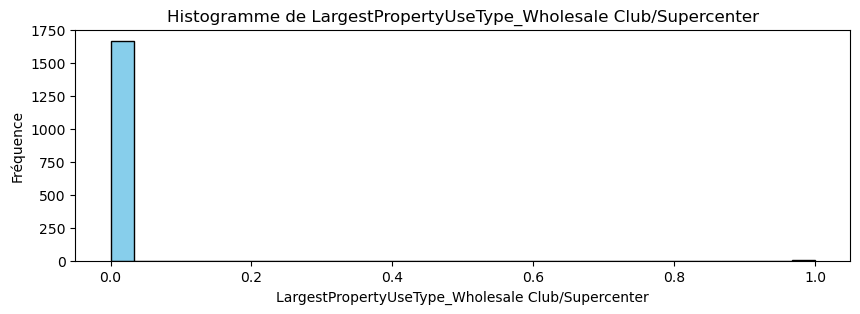

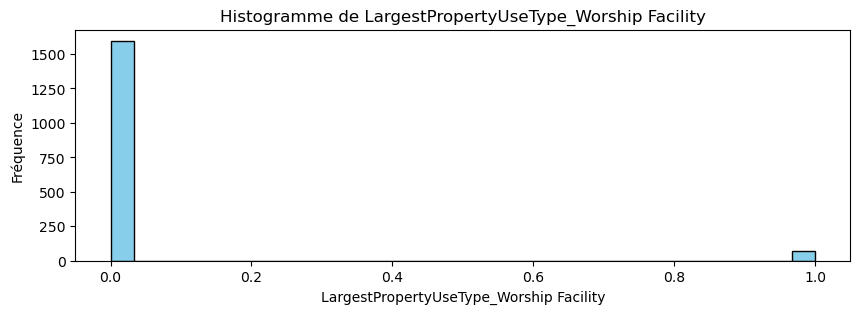

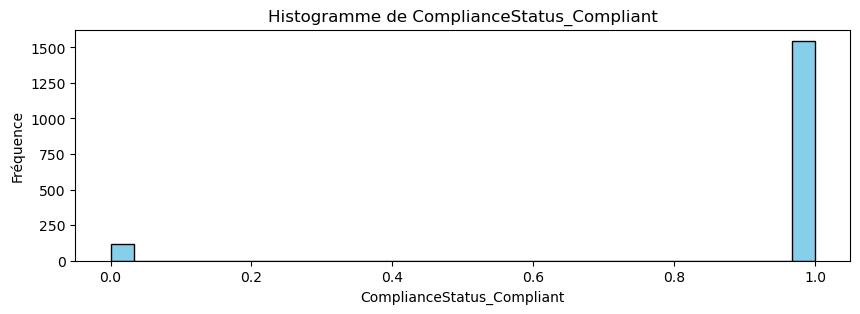

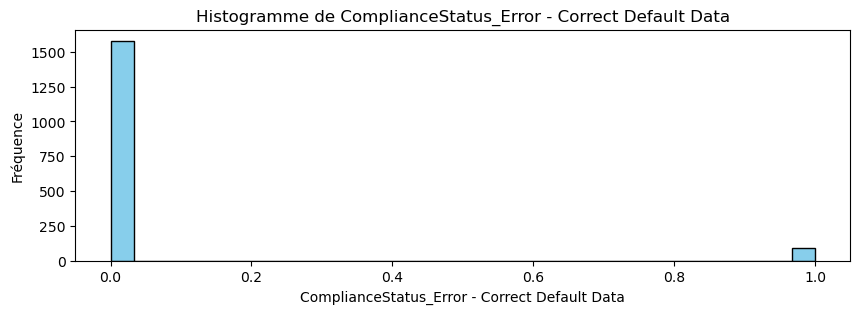

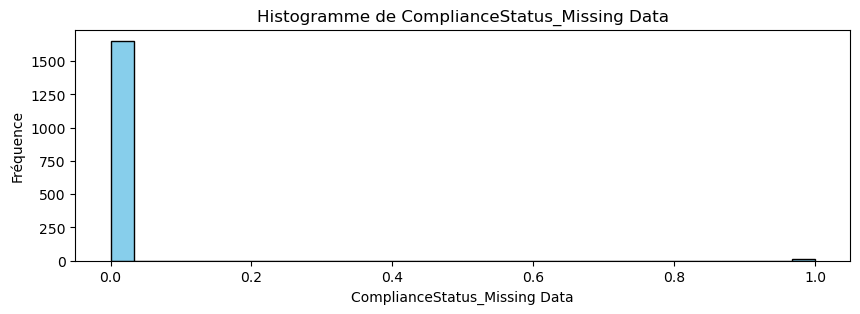

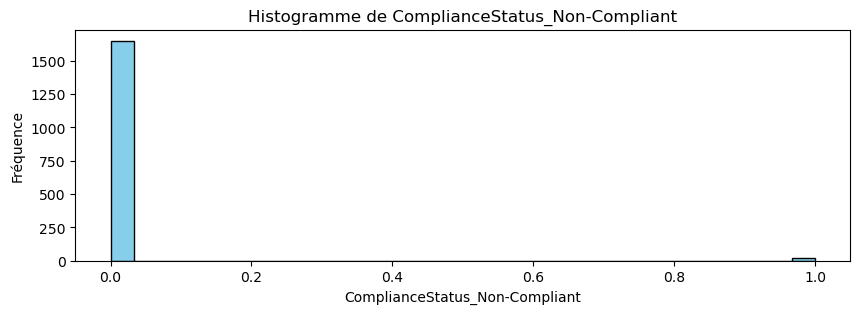

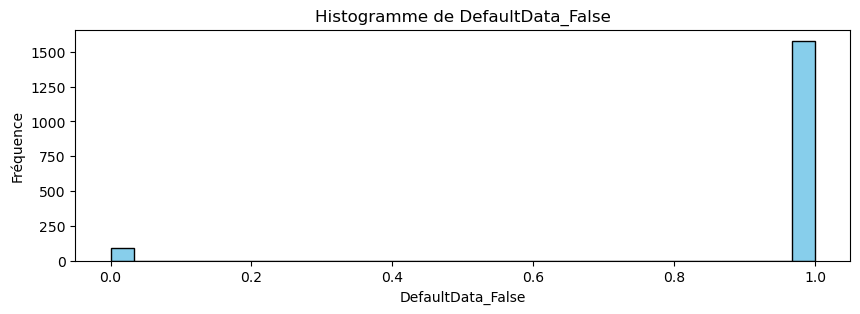

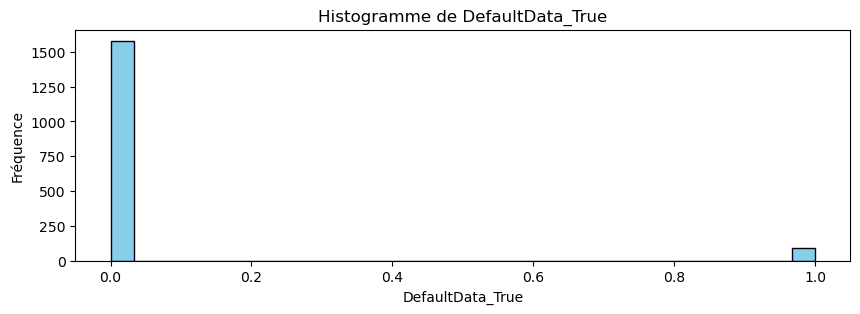

In [36]:
for column in non_residential_df.columns:
    plt.figure(figsize=(10, 3 ))
    plt.hist(non_residential_df[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogramme de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')
    plt.show()